<h1><center>ENGR296 - Final Project</h1></center>
<h1><center>Credit Card Fraud Detection</h1></center>

<h3 style="color:blue"><center>Name : Amit Padgaonkar</h3></center>
<h3 style="color:blue"><center>Student ID : 862188375</h3></center>

In [1334]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [1335]:
df=pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

<h1 style="color:brown"><center>Data Exploration</h3></center>

In [1336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**All our columns are Numeric, which means we don't need any Categorical Label -> Numeric data conversion**

In [1337]:
#Calculating the % of Null values in each column
df.isnull().sum()/df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

**There are no NULL values**

In [1338]:
df.shape

(284807, 31)

**Checking obvious correlations in the data**

In [1339]:
df.corr()
df.corr().style.set_precision(3)

**Plotting the heatmap of data to see if there any obvious correlations**

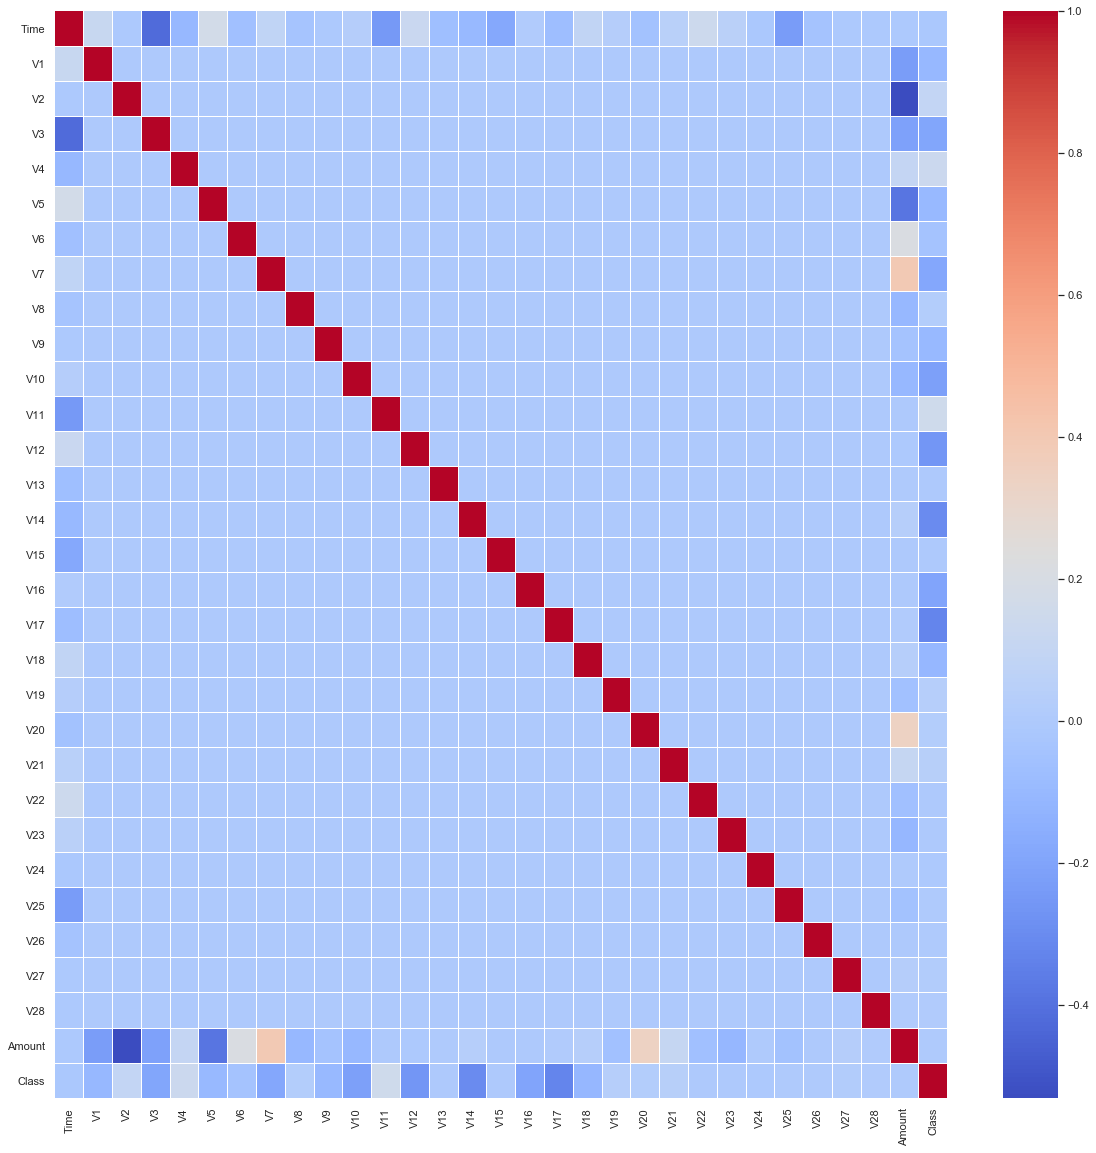

In [1340]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,20))
figure.set_facecolor('w')
sns.heatmap(df.corr(),annot=False,linewidths=0.01,cmap='coolwarm')
plt.show()

**We can see from the correlation data and heatmap, we can see that the V13,V15,V22,V23,V24,V25,V26 have very little correlation with our target variable Class**

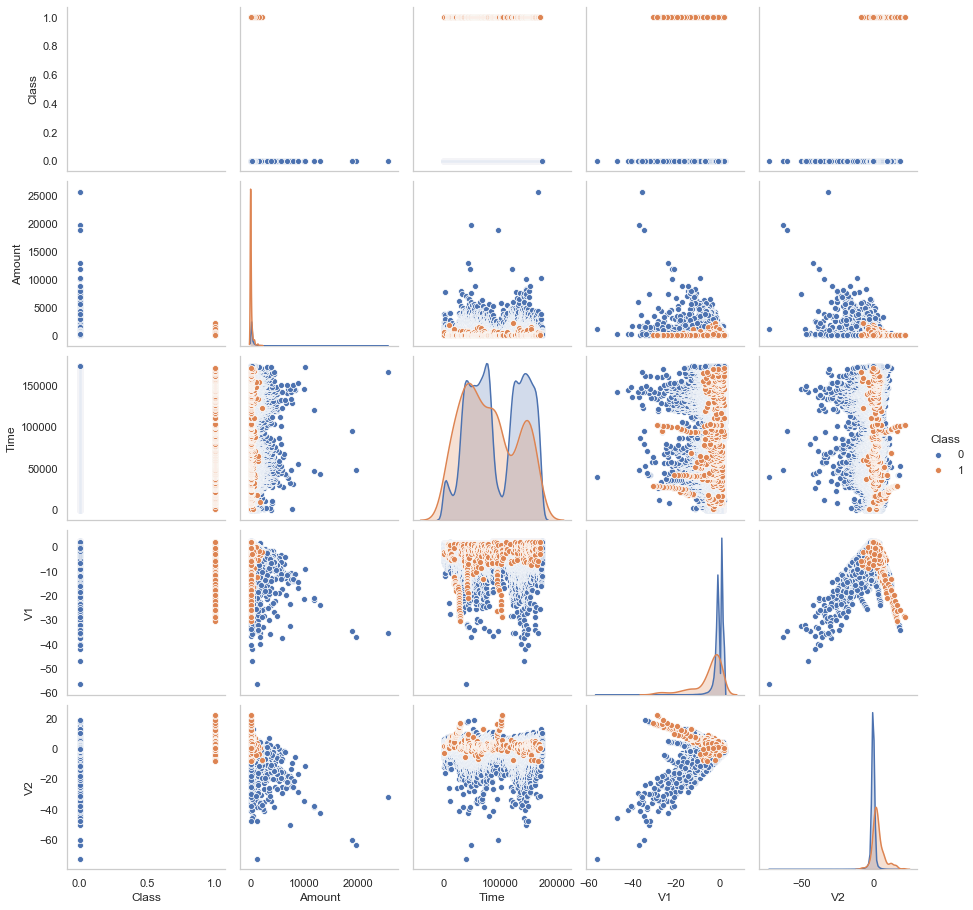

In [1341]:
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(df,vars = ['Class', 'Amount', 'Time','V1','V2'], hue = 'Class')

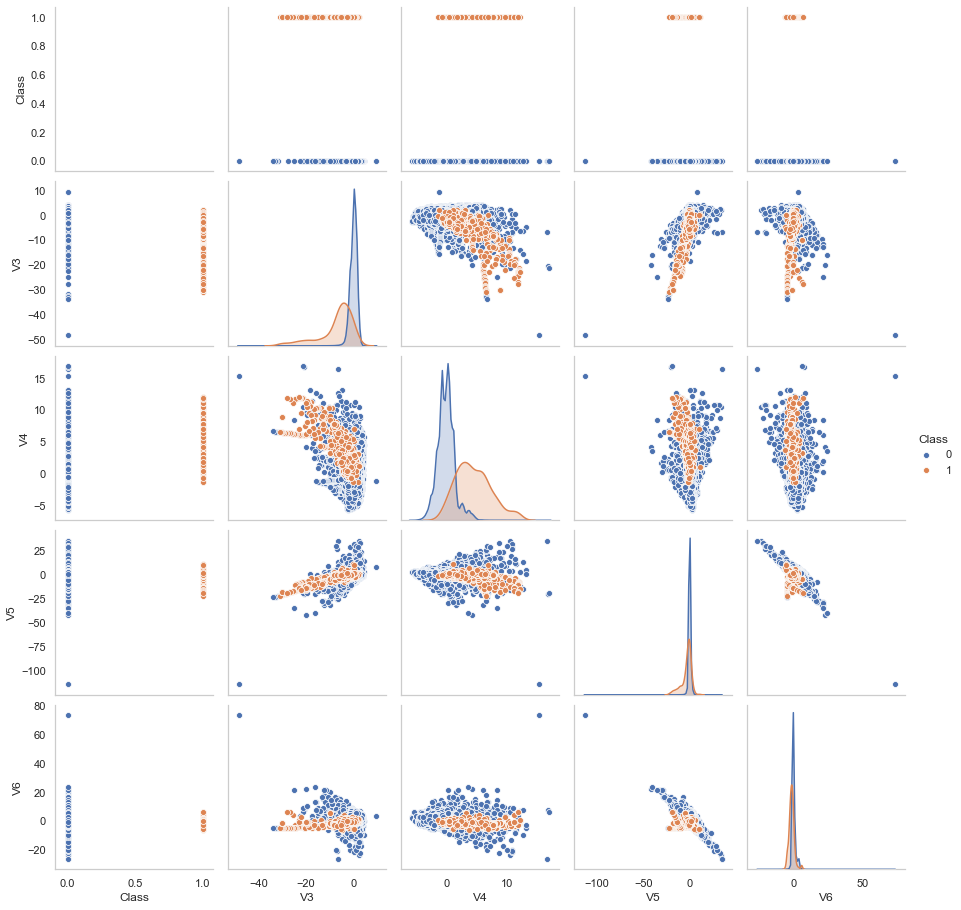

In [1342]:
sns.pairplot(df,vars = ['Class','V3', 'V4', 'V5','V6'], hue = 'Class')

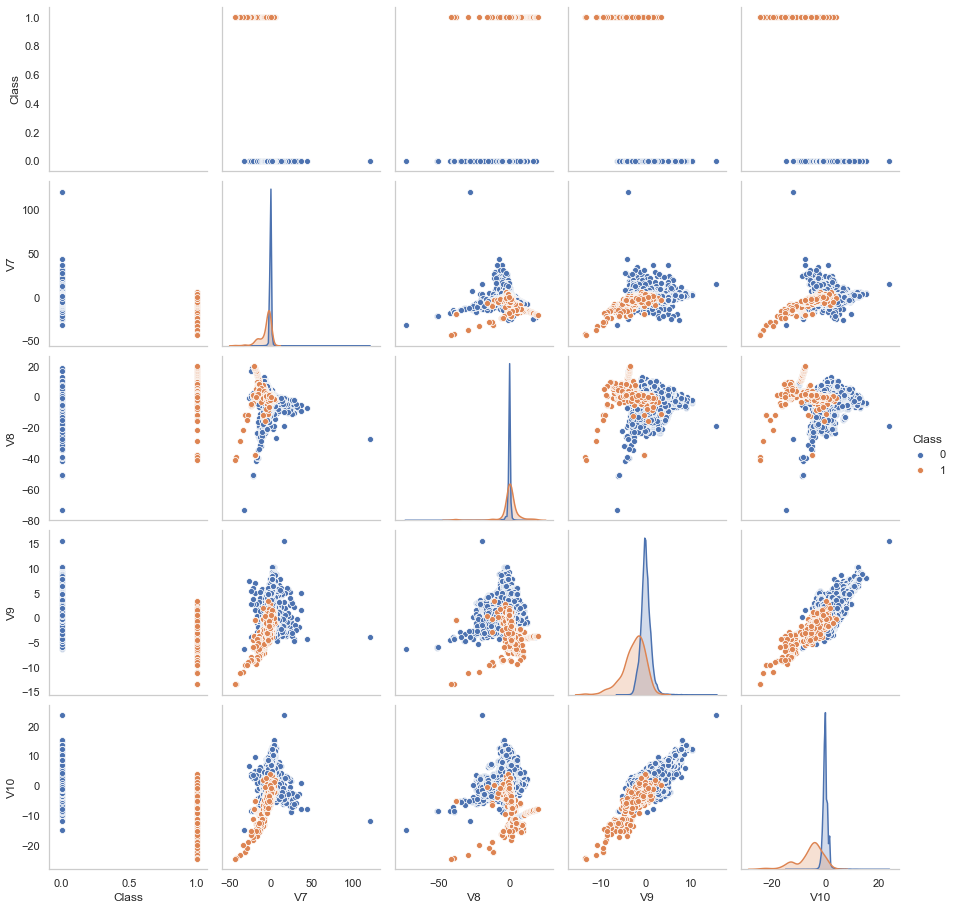

In [1343]:
sns.pairplot(df,vars = ['Class','V7', 'V8', 'V9','V10'], hue = 'Class')

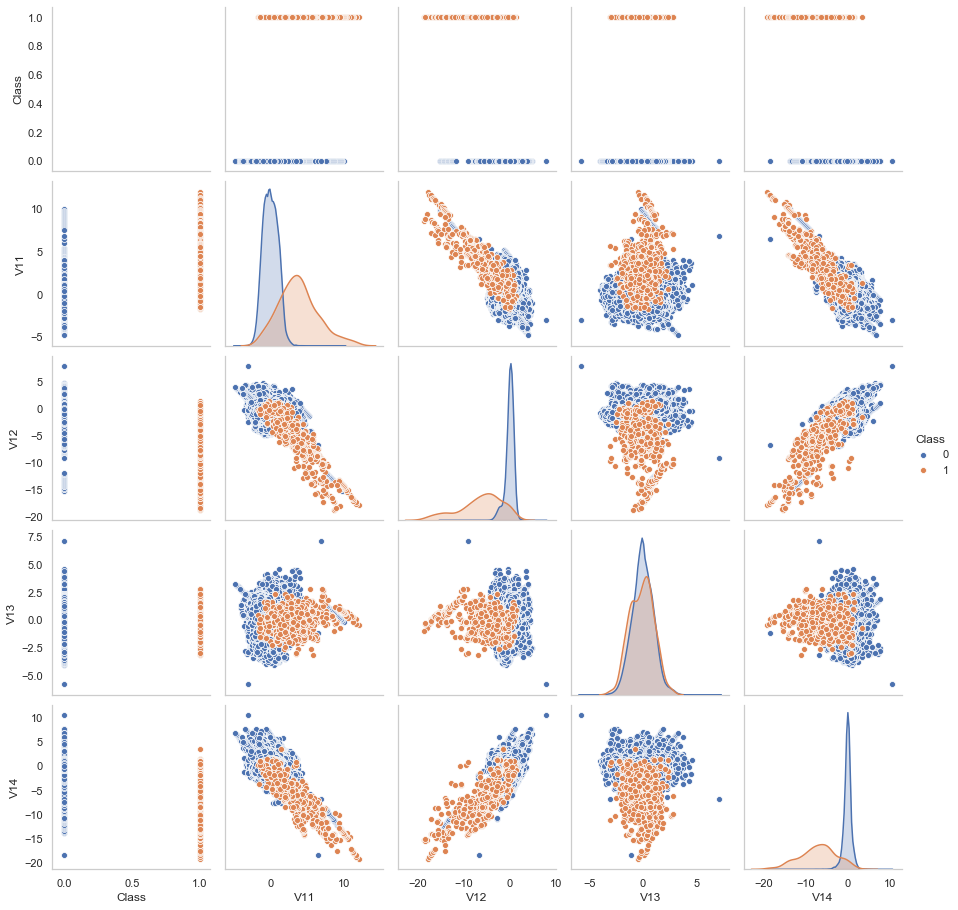

In [1344]:
sns.pairplot(df,vars = ['Class','V11', 'V12', 'V13','V14'], hue = 'Class')

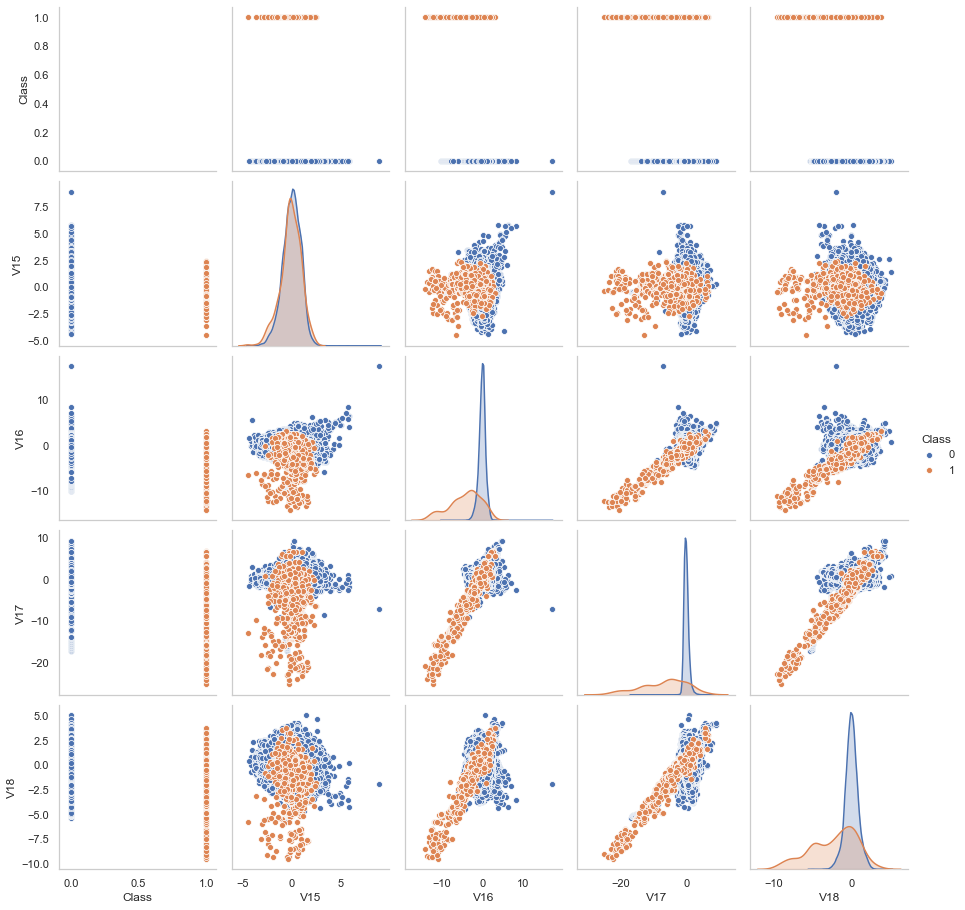

In [1345]:
sns.pairplot(df,vars = ['Class','V15', 'V16', 'V17','V18'], hue = 'Class')

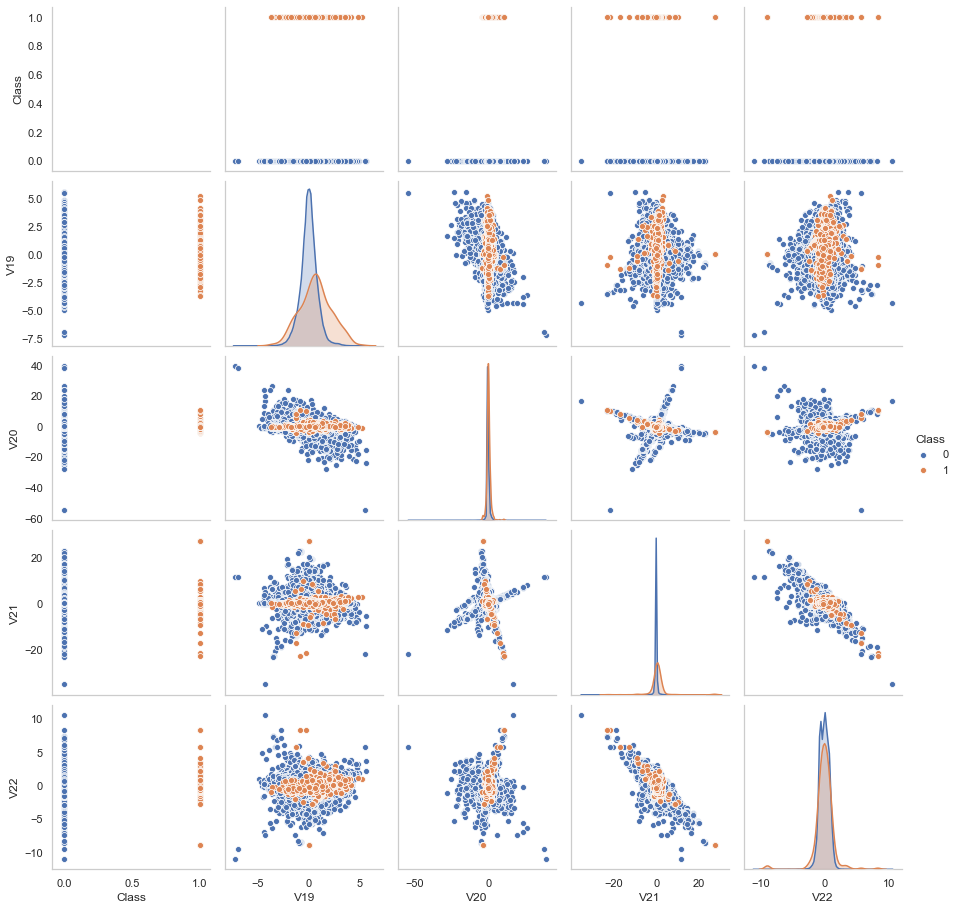

In [1346]:
sns.pairplot(df,vars = ['Class','V19', 'V20', 'V21','V22'], hue = 'Class')

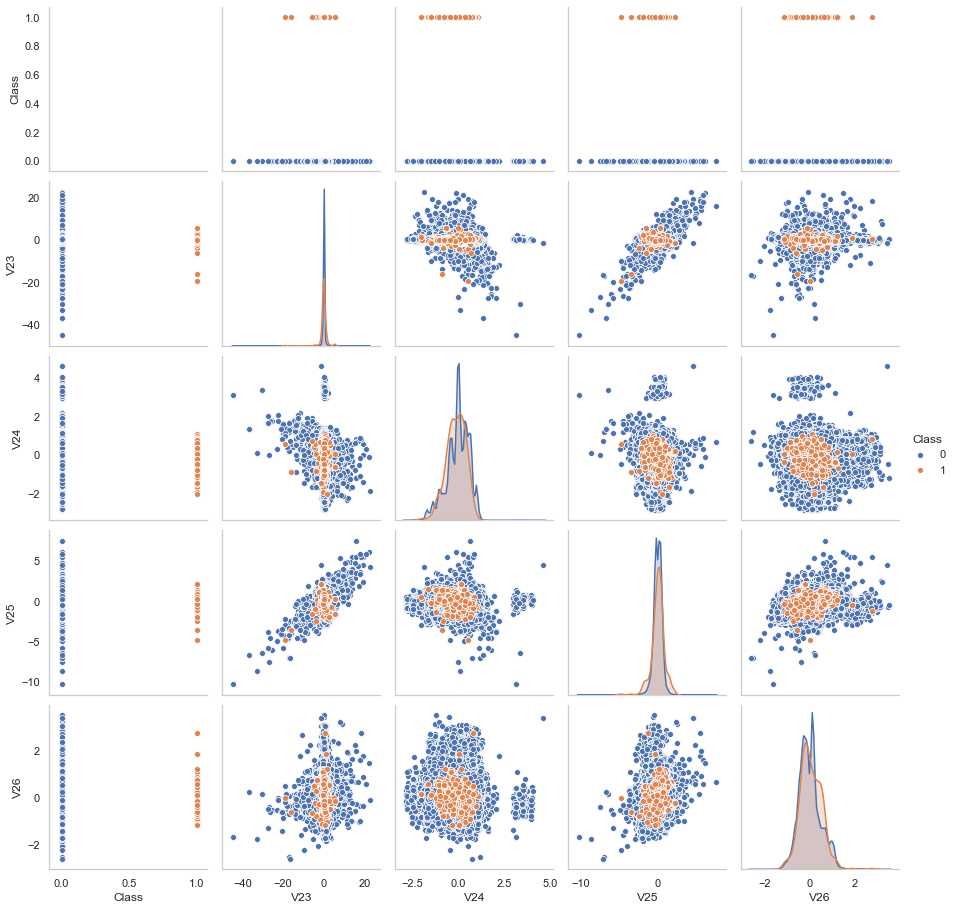

In [1347]:
sns.pairplot(df,vars = ['Class','V23', 'V24', 'V25','V26'], hue = 'Class')

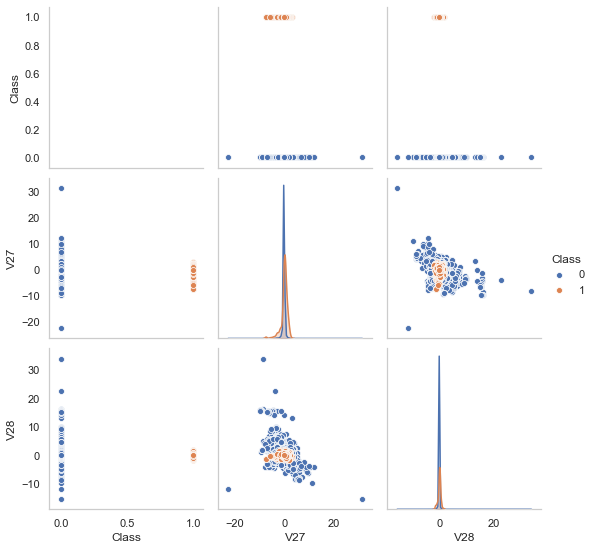

In [1348]:
sns.pairplot(df,vars = ['Class','V27', 'V28'], hue = 'Class')

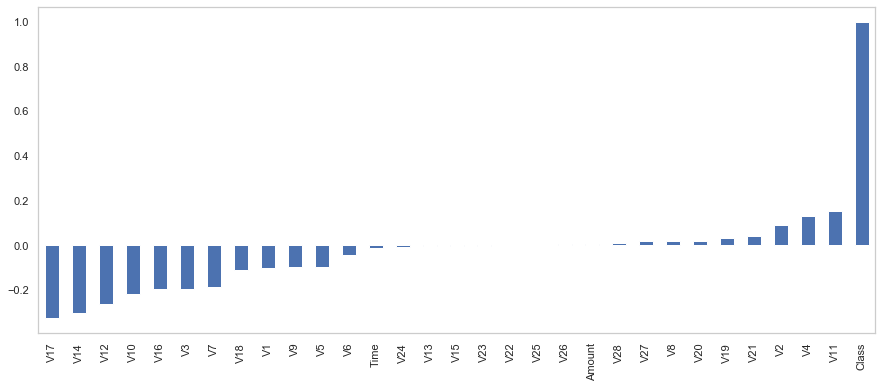

In [1039]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(15,6))
figure.set_facecolor('w')
ax = df.corr()['Class'].sort_values().plot(kind='bar',color='b',grid=False)
ax.set_facecolor('w')

We will drop the columns V13,V15,V22,V23,V25,V26 which have no correlation and may not add value to our classification model

In [1040]:
print("The range of Amount column min = "+ str(df['Amount'].min()) +" max = "+ str(df['Amount'].max()))

The range of Amount column min = 0.0 max = 25691.16


The range of Amount is high, we should convert it to log scale.

**Checking the distribution of values in the target column Class**

In [1047]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [1048]:
df["Class"].value_counts()/df.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

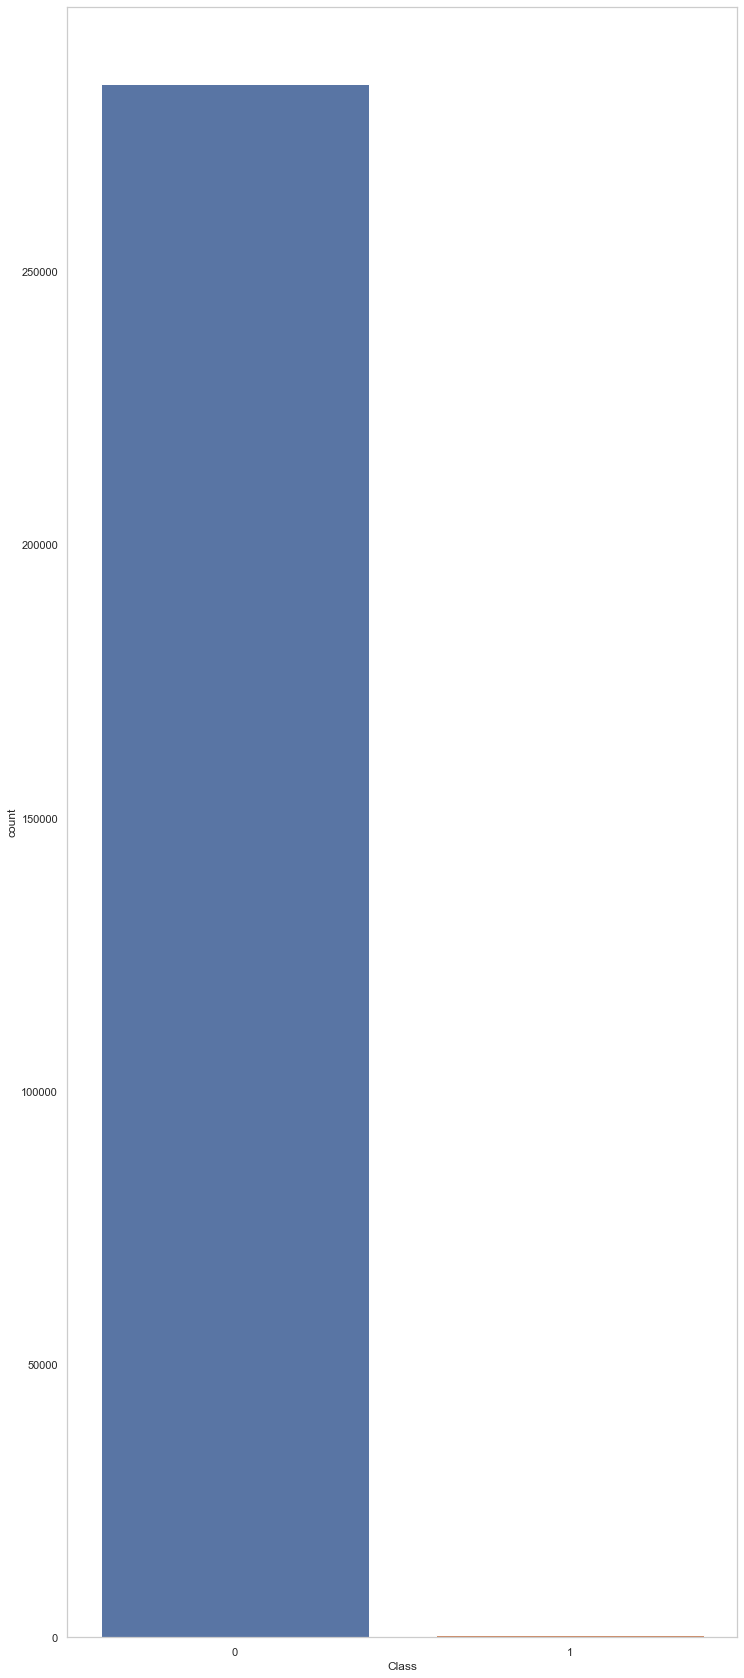

In [1071]:
fig, ax = plt.subplots(figsize=(12,30))
sns.countplot(ax=ax, x='Class', data=df)

Values for the minority class which indicate fraudulent transacations are **only 0.1727 % of the total data**. The fraud class bar on the barchart is **barely visible.** This is clearly a ***SEVERLY IMBALANCED*** dataset.

### Data Visualisation in 2-dimensional space

In [1054]:
#For sampling, we will get all the samples from fraud class and only a fraction of legitimate transactions
fraud_instances = len(df[df["Class"] == 1])
fraud_data = df[df["Class"] == 1]
legitimate_data = df[df["Class"] == 0]
subset_legitimate_data = legitimate_data.sample(fraud_instances*12) #Only about 2% of legitimate transactions
fraud_data.reset_index(drop=True, inplace=True)
subset_legitimate_data.reset_index(drop=True, inplace=True)
sample_data = pd.concat([fraud_data,subset_legitimate_data])

X_visualization = sample_data.drop('Class', axis=1)
y_visualization = sample_data['Class']

#Applying the standard scaler that we are going to use later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_visualization=scaler.fit_transform(X_visualization)

In [1055]:
#Run TSNE dimensionality reduction
from sklearn.manifold import TSNE
X_reduced_dim = TSNE(n_components=2, random_state=42).fit_transform(X_visualization)

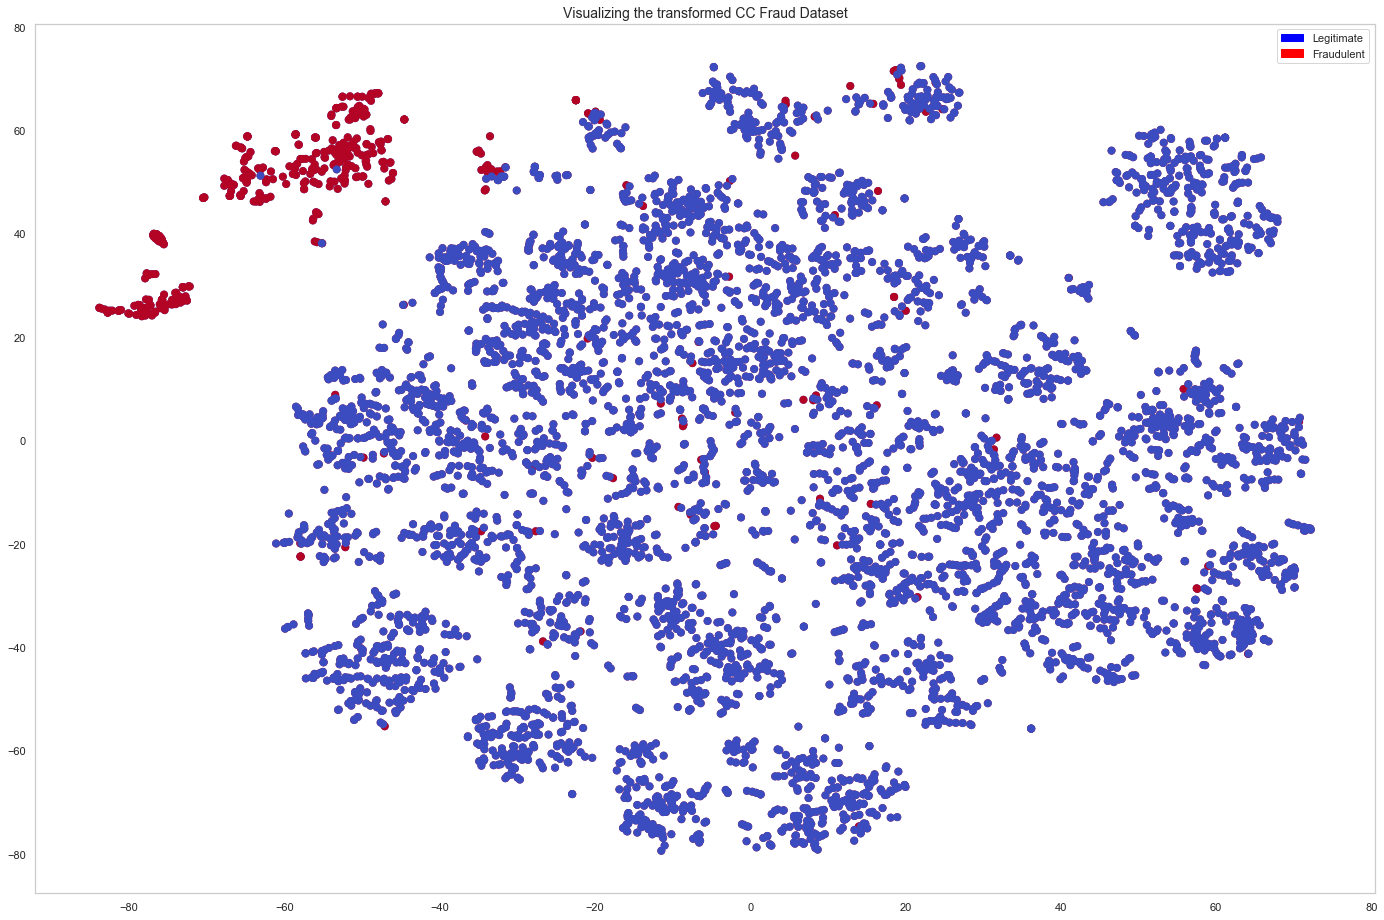

In [1056]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


legitimate = mpatches.Patch(color='blue', label='Legitimate')
fraudulent = mpatches.Patch(color='red', label='Fraudulent')

ax.scatter(X_reduced_dim[:,0], X_reduced_dim[:,1], c=(y_visualization == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_dim[:,0], X_reduced_dim[:,1], c=(y_visualization == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('Visualizing the transformed CC Fraud Dataset', fontsize=14)

ax.grid(False)
ax.set_facecolor('w')

ax.legend(handles=[legitimate, fraudulent])



<h1 style="color:brown"><center>Data Preprocessing</h3></center>

**Let's drop the columns that have very little correlation**

In [1057]:
df.drop(columns=['V22','V25','V26'],inplace=True, axis=1)

**Convert the amount to log scale**

In [1058]:
df['Amount'] = np.log(df['Amount'] + 0.001)

The number of minority class (positive) samples are very rare (only 492).
While splitting the dataset, let us do it in a way that maintains the same class distribution in each subset.
We will do it through ***STRATIFIED SAMPLING*** by using target variable to control the sampling process.

In [1059]:
#Class is the target variable
X=df.loc[:, df.columns != 'Class']
y=df[['Class']]

In [1060]:
X.shape, y.shape

((284807, 27), (284807, 1))

In [1061]:
# split into train/test sets with same class ratio
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=100,stratify=y)

In [1062]:
train_0, train_1 = len(trainy[trainy['Class']==0]), len(trainy[trainy['Class']==1])
test_0, test_1 = len(testy[testy['Class']==0]), len(testy[testy['Class']==1])
print('Checking the Split -->Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

Checking the Split -->Train: 0=199020, 1=344, Test: 0=85295, 1=148


**Split looks good**

One approach to addressing imbalanced datasets is to oversample the minority class. New examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique **(SMOTE)**. We will use a variant of SMOTE based on Support Vector Machine(SVM) called **SVMSMOTE**

In [1063]:
from collections import Counter

In [1064]:
counter = Counter(trainy['Class'])
print(counter)

Counter({0: 199020, 1: 344})


In [1065]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

trainX=scaler.fit_transform(trainX)
testX=scaler.transform(testX)

In [1066]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE(sampling_strategy=1)
trainX_scaled, trainy_scaled = oversample.fit_resample(trainX, trainy)
counter = Counter(trainy_scaled['Class'])

In [1067]:
print(counter)

Counter({0: 199020, 1: 199020})


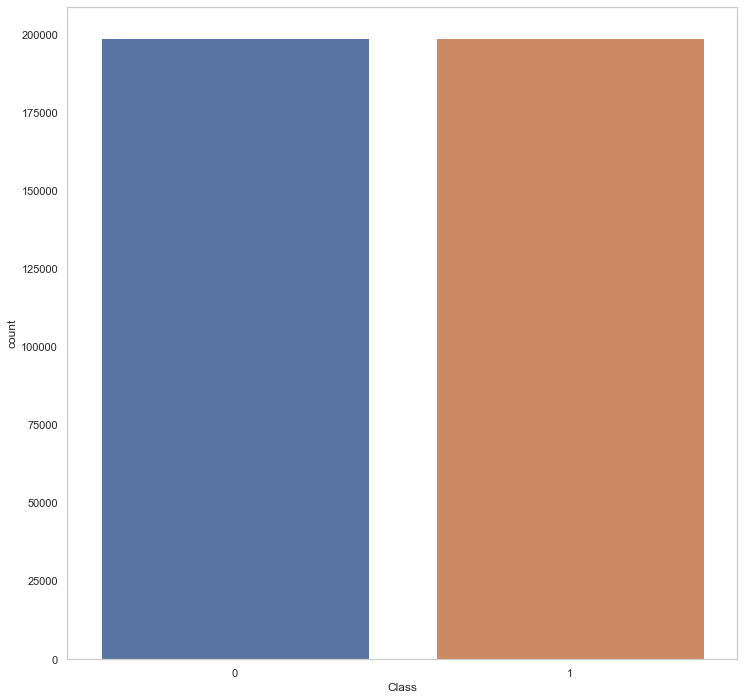

In [1069]:
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(ax=ax, x='Class',data=trainy_scaled)

**Oversized sampling has brought the size of minority class sample to one third of that of majority class.**

In [1289]:
# Arrays for barplots

arr_table_labels = []
arr_barchart_labels = []
arr_accuracy = []
arr_precision = []
arr_recall = []
arr_f1score = []
arr_f2measure = []
arr_roc_auc = []
arr_tn = []
arr_fp = []
arr_fn = []
arr_tp = []

In [1290]:
from sklearn.metrics import confusion_matrix
def plot_cm(ax,labels, predictions,color_index,title, p=0.5):
  cm_colors = ['BuGn','coolwarm','YlOrRd','YlOrBr','OrRd', 'PuRd', 'RdPu', 'BuPu']
  cm = confusion_matrix(labels, predictions > p)
  #plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d",xticklabels = ["No", "Yes"] , yticklabels = ["legitimate", "Fraudulent"],cbar=False,cmap=cm_colors[color_index])
  ax.set_title(title.format(p))
  ax.set_ylabel('Actual label')
  ax.set_xlabel('Predicted label')
  ax.set_facecolor('w')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  arr_tn.append(cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  arr_fp.append(cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  arr_fn.append(cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  arr_tp.append(cm[1][1])
  print('Total Fraudulent Transactions in validation dataset: ', np.sum(cm[1]))

In [1291]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

def calculate_and_plot(model,color_index,title,label,algorithm):
    # predict crisp classes for test set
    yhat_classes = model.predict(testX)
    # predict probabilities for test set
    yhat_probs = model.predict_proba(testX)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)
    
    calculate_and_print_scores(testy, yhat_classes,yhat_probs[:, 1])

    plot_roc_auc(ax1,testy, yhat_probs[:, 1], label)
    
    plot_cm(ax2,testy, yhat_classes,color_index,title)
       
    create_barchart_label(label,algorithm)
    
    create_table_label(label,algorithm)

In [1292]:
def calculate_and_print_scores(testy, yhat_classes, yhat_probs):
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, yhat_classes)
    print('Accuracy: %f' % accuracy)
    arr_accuracy.append(accuracy)
    
    # precision tp / (tp + fp)
    precision = precision_score(testy, yhat_classes)
    print('Precision: %f' % precision)
    arr_precision.append(precision)
      
    # recall: tp / (tp + fn)
    recall = recall_score(testy, yhat_classes)
    print('Sensitivity AKA Recall: %f' % recall)
    arr_recall.append(recall)
    
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, yhat_classes)
    print('F1 score: %f' % f1)
    arr_f1score.append(f1)
    
    #F2 Measure
    f = fbeta_score(testy, yhat_classes, beta=2.0)
    print('F2-Measure: %f' % f)
    arr_f2measure.append(f)
   
    # ROC AUC
    rocauc = roc_auc_score(testy, yhat_probs)
    print('ROC AUC: %f' % rocauc)
    arr_roc_auc.append(rocauc)

In [1293]:
import matplotlib.pyplot as plt

def plot_roc_auc(ax,testy, yhat_probs,label):
    #Show ROC-AUC Plot
    #fig = plt.figure(figsize=(5,5))
    #fig.set_facecolor('w')
    # plot no skill roc curve
    ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='No Skill')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(testy, yhat_probs)
    # plot model roc curve
    ax.plot(fpr, tpr, marker='.',color='green', linewidth=4, label = label)
    # axis labels
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim(0,1)
    ax.set_ylabel('True Positive Rate')
    ax.set_ylim(0,1)
    ax.set_xticks(np.arange(0, 1, step=0.1))
    ax.set_yticks(np.arange(0, 1, step=0.1))
    ax.set_facecolor('w')
    

    #fig.suptitle('Receiver Operating Characteristics (ROC) Curve', fontsize=20)
    # show the legend
    ax.legend()
    # show the plot

In [1294]:
def create_barchart_label(label,algorithm):
    barchart_label = algorithm.upper() + " -> " + label
    arr_barchart_labels.append(barchart_label)

In [1295]:
def create_table_label(label,algorithm):
    table_label = algorithm.upper() + " -> " + label
    arr_table_labels.append(table_label)

<h1 style="color:brown"><center>Creating ML Models</h1></center>

<h1 style="color:brown"><center>1. Ensemble Algorithms</h3></center>

## Balanced Bagging Classifier Algorithm

In [1182]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

def create_bal_bg_classifier_model(n_estimators=1,max_samples=0.1,max_depth=100,sampling_strategy=0.1):
    clf = BalancedBaggingClassifier(DecisionTreeClassifier(max_depth=max_depth),max_samples=max_samples,n_estimators=n_estimators,sampling_strategy=sampling_strategy,replacement=True)
    return clf


In [1183]:
clf_bbg_001 = create_bal_bg_classifier_model(100,max_samples=0.1,max_depth=100,sampling_strategy=0.01)
clf_bbg_001 = clf_bbg_001.fit(trainX, trainy)

Accuracy: 0.999122
Precision: 0.710983
Sensitivity AKA Recall: 0.831081
F1 score: 0.766355
F2-Measure: 0.803922
ROC AUC: 0.937494
Legitimate Transactions Detected (True Negatives):  85245
Legitimate Transactions Incorrectly Detected (False Positives):  50
Fraudulent Transactions Missed (False Negatives):  25
Fraudulent Transactions Detected (True Positives):  123
Total Fraudulent Transactions in validation dataset:  148


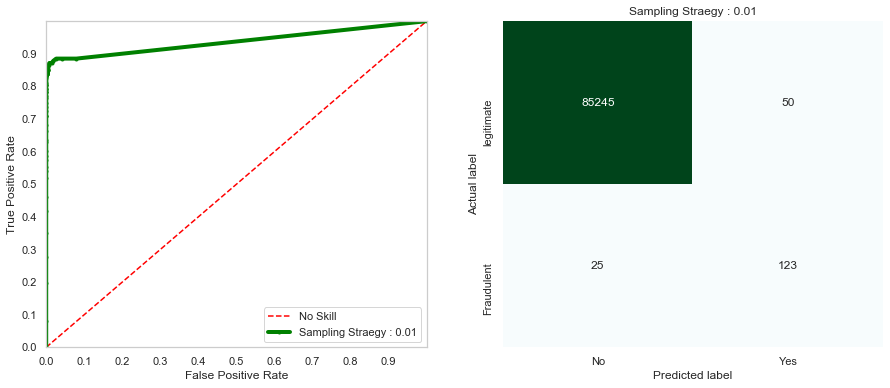

In [1296]:
calculate_and_plot(clf_bbg_001,0,'Sampling Straegy : 0.01','Sampling Straegy : 0.01','Bagging')

In [1185]:
clf_bbg_01 = create_bal_bg_classifier_model(100,max_samples=0.1,max_depth=100,sampling_strategy=0.1)
clf_bbg_01 = clf_bbg_01.fit(trainX, trainy)

Accuracy: 0.996781
Precision: 0.330667
Sensitivity AKA Recall: 0.837838
F1 score: 0.474187
F2-Measure: 0.641158
ROC AUC: 0.945874
Legitimate Transactions Detected (True Negatives):  85044
Legitimate Transactions Incorrectly Detected (False Positives):  251
Fraudulent Transactions Missed (False Negatives):  24
Fraudulent Transactions Detected (True Positives):  124
Total Fraudulent Transactions in validation dataset:  148


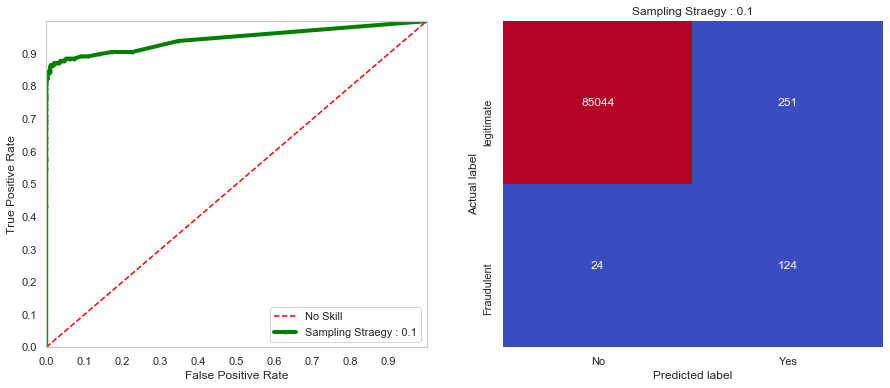

In [1297]:
calculate_and_plot(clf_bbg_01,1,'Sampling Straegy : 0.1','Sampling Straegy : 0.1','Bagging')

In [1187]:
clf_bbg_1 = create_bal_bg_classifier_model(100,max_samples=0.1,max_depth=100,sampling_strategy=1)
clf_bbg_1.fit(trainX, trainy)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100),
                          max_samples=0.1, n_estimators=100, replacement=True,
                          sampling_strategy=1)

Accuracy: 0.975235
Precision: 0.057951
Sensitivity AKA Recall: 0.871622
F1 score: 0.108677
F2-Measure: 0.228886
ROC AUC: 0.961538
Legitimate Transactions Detected (True Negatives):  83198
Legitimate Transactions Incorrectly Detected (False Positives):  2097
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  129
Total Fraudulent Transactions in validation dataset:  148


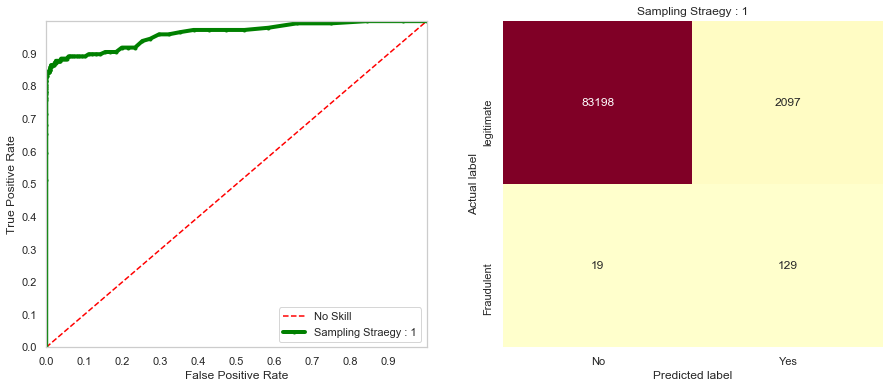

In [1298]:
calculate_and_plot(clf_bbg_1,2,'Sampling Straegy : 1','Sampling Straegy : 1','Bagging')

## Random Forest Classifier with Class Weighting

In [1189]:
from sklearn.ensemble import RandomForestClassifier

def create_rf_classifier_model(n_estimators=100,max_samples=0.1,max_depth=10,class_weight='balanced_subsample'):
    clf = RandomForestClassifier(max_depth=max_depth,max_samples=max_samples,n_estimators=n_estimators,class_weight=class_weight)
    return clf

In [1355]:
clf_rf_1 =  create_rf_classifier_model(100,max_samples=0.2,max_depth=15,class_weight = {0: 1, 1: 1})
clf_rf_1 = clf_rf_1.fit(trainX, trainy)

Accuracy: 0.999356
Precision: 0.884298
Sensitivity AKA Recall: 0.722973
F1 score: 0.795539
F2-Measure: 0.750351
ROC AUC: 0.944044
Legitimate Transactions Detected (True Negatives):  85281
Legitimate Transactions Incorrectly Detected (False Positives):  14
Fraudulent Transactions Missed (False Negatives):  41
Fraudulent Transactions Detected (True Positives):  107
Total Fraudulent Transactions in validation dataset:  148


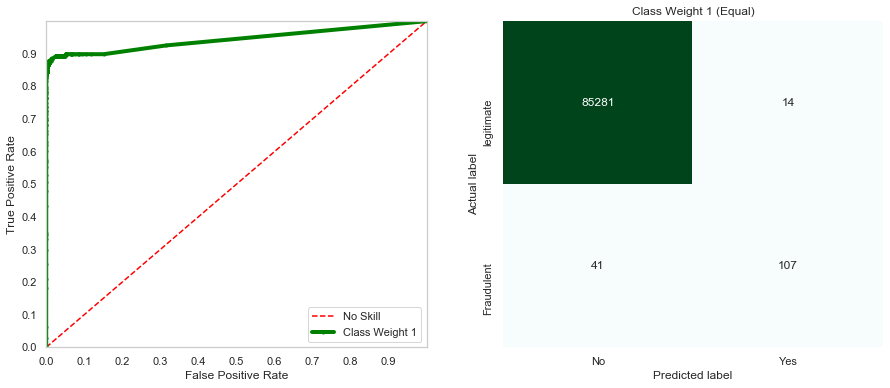

In [1356]:
calculate_and_plot(clf_rf_1,0,'Class Weight 1 (Equal)','Class Weight 1','Random Forest')

In [1192]:
clf_rf_100 =  create_rf_classifier_model(100,max_samples=0.2,max_depth=15,class_weight = {0:1, 1:100})
clf_rf_100 = clf_rf_100.fit(trainX, trainy)

Accuracy: 0.995681
Precision: 0.266385
Sensitivity AKA Recall: 0.851351
F1 score: 0.405797
F2-Measure: 0.591549
ROC AUC: 0.957426
Legitimate Transactions Detected (True Negatives):  84948
Legitimate Transactions Incorrectly Detected (False Positives):  347
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  126
Total Fraudulent Transactions in validation dataset:  148


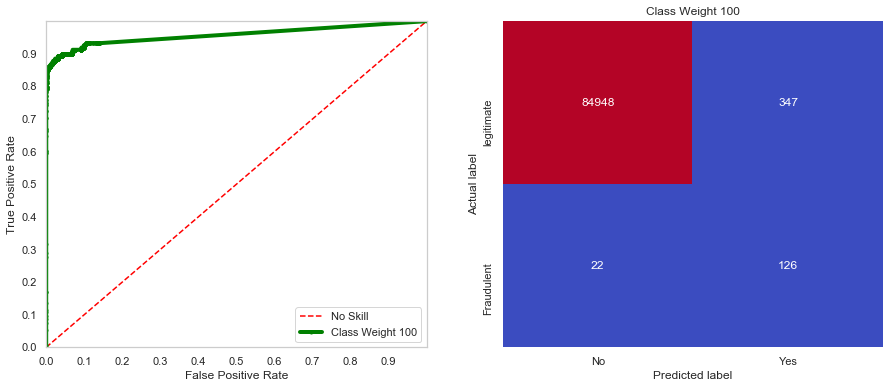

In [1300]:
calculate_and_plot(clf_rf_100,1,'Class Weight 100','Class Weight 100','Random Forest')

In [1351]:
clf_rf_1000 =  create_rf_classifier_model(100,max_samples=0.2,max_depth=15,class_weight = {0:1, 1:1000})
clf_rf_1000 = clf_rf_100.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.980431
Precision: 0.072391
Sensitivity AKA Recall: 0.871622
F1 score: 0.133679
F2-Measure: 0.271693
ROC AUC: 0.972310
Legitimate Transactions Detected (True Negatives):  83642
Legitimate Transactions Incorrectly Detected (False Positives):  1653
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  129
Total Fraudulent Transactions in validation dataset:  148


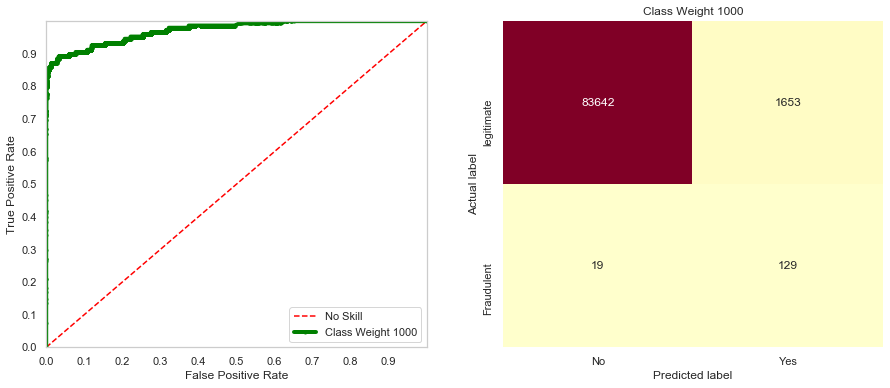

In [1352]:
calculate_and_plot(clf_rf_100,2,'Class Weight 1000','Class Weight 1000','Random Forest')

<h1 style="color:brown"><center>2. Cost Sensisitive Algorithms</h3></center>

## Cost Sensitive Logistic Regression

In [1196]:
from sklearn.linear_model import LogisticRegression

def create_cslr_classifier_model(class_weight):
    clf = LogisticRegression(solver='lbfgs',class_weight=class_weight)
    return clf

In [1197]:
clf_lr_1 =  create_cslr_classifier_model([{0: 1, 1: 1}])
clf_lr_1 = clf_lr_1.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.994640
Precision: 0.223214
Sensitivity AKA Recall: 0.844595
F1 score: 0.353107
F2-Measure: 0.542535
ROC AUC: 0.953544
Legitimate Transactions Detected (True Negatives):  84860
Legitimate Transactions Incorrectly Detected (False Positives):  435
Fraudulent Transactions Missed (False Negatives):  23
Fraudulent Transactions Detected (True Positives):  125
Total Fraudulent Transactions in validation dataset:  148


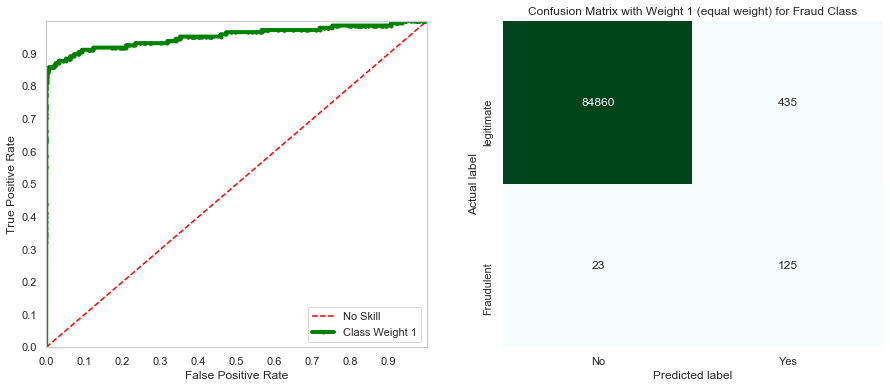

In [1302]:
calculate_and_plot(clf_lr_1,0,'Confusion Matrix with Weight 1 (equal weight) for Fraud Class','Class Weight 1','Logistic Regression')

In [1199]:
clf_lr_100 =  create_cslr_classifier_model([{0: 1, 1: 100}])
clf_lr_100 = clf_lr_100.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.994640
Precision: 0.223214
Sensitivity AKA Recall: 0.844595
F1 score: 0.353107
F2-Measure: 0.542535
ROC AUC: 0.953544
Legitimate Transactions Detected (True Negatives):  84860
Legitimate Transactions Incorrectly Detected (False Positives):  435
Fraudulent Transactions Missed (False Negatives):  23
Fraudulent Transactions Detected (True Positives):  125
Total Fraudulent Transactions in validation dataset:  148


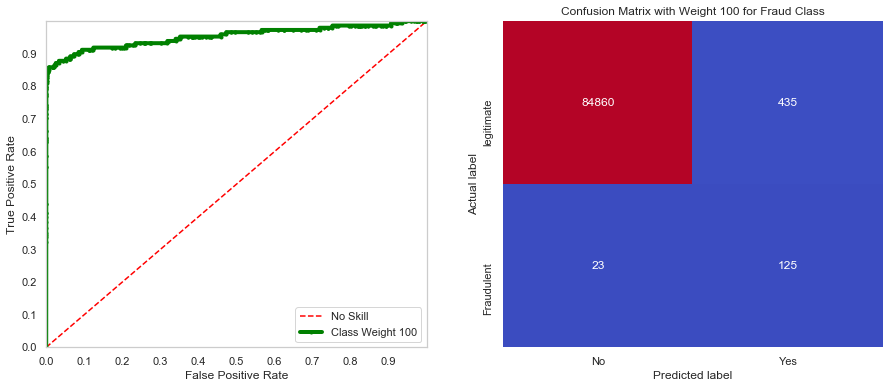

In [1303]:
calculate_and_plot(clf_lr_100,1,'Confusion Matrix with Weight 100 for Fraud Class','Class Weight 100','Logistic Regression')

In [1331]:
clf_lr_1000 =  create_cslr_classifier_model([{0: 1, 1: 1000}])
clf_lr_1000 = clf_lr_1000.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.994640
Precision: 0.223214
Sensitivity AKA Recall: 0.844595
F1 score: 0.353107
F2-Measure: 0.542535
ROC AUC: 0.953544
Legitimate Transactions Detected (True Negatives):  84860
Legitimate Transactions Incorrectly Detected (False Positives):  435
Fraudulent Transactions Missed (False Negatives):  23
Fraudulent Transactions Detected (True Positives):  125
Total Fraudulent Transactions in validation dataset:  148


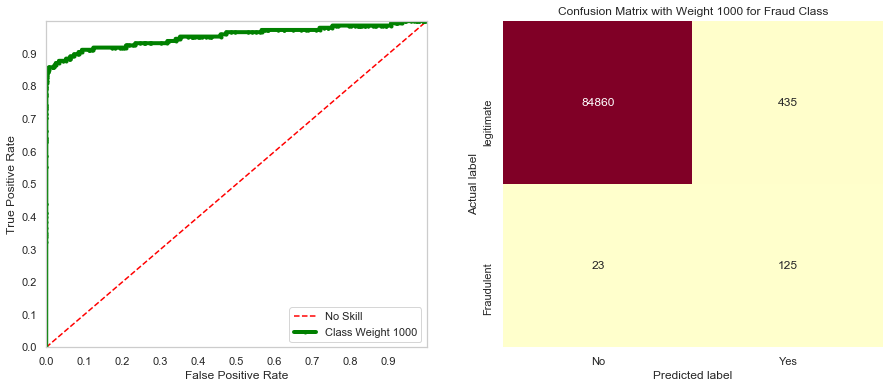

In [1332]:
calculate_and_plot(clf_lr_1000,2,'Confusion Matrix with Weight 1000 for Fraud Class','Class Weight 1000','Logistic Regression')

## Cost Sensitive Decision Trees

In [1203]:
def create_csdt_classifier_model(class_weight,max_depth=None):
    model = DecisionTreeClassifier(max_depth=max_depth,class_weight=class_weight)
    return model

In [1204]:
clf_dt_1 =  create_csdt_classifier_model({0: 1.0, 1: 1.0})
clf_dt_1 = clf_dt_1.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.999122
Precision: 0.708571
Sensitivity AKA Recall: 0.837838
F1 score: 0.767802
F2-Measure: 0.808344
ROC AUC: 0.918620
Legitimate Transactions Detected (True Negatives):  85244
Legitimate Transactions Incorrectly Detected (False Positives):  51
Fraudulent Transactions Missed (False Negatives):  24
Fraudulent Transactions Detected (True Positives):  124
Total Fraudulent Transactions in validation dataset:  148


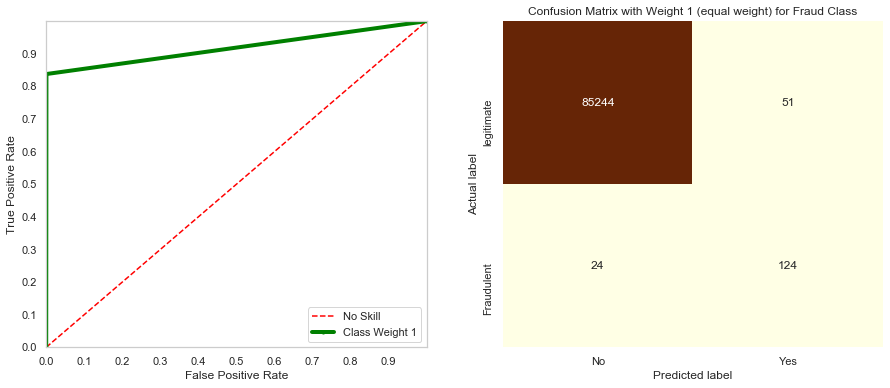

In [1305]:
calculate_and_plot(clf_dt_1,3,'Confusion Matrix with Weight 1 (equal weight) for Fraud Class','Class Weight 1','Decision Tree')

In [1206]:
clf_dt_10 =  create_csdt_classifier_model({0: 1.0, 1: 100.0})
clf_dt_10 = clf_dt_10.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.998912
Precision: 0.648649
Sensitivity AKA Recall: 0.810811
F1 score: 0.720721
F2-Measure: 0.772201
ROC AUC: 0.905024
Legitimate Transactions Detected (True Negatives):  85230
Legitimate Transactions Incorrectly Detected (False Positives):  65
Fraudulent Transactions Missed (False Negatives):  28
Fraudulent Transactions Detected (True Positives):  120
Total Fraudulent Transactions in validation dataset:  148


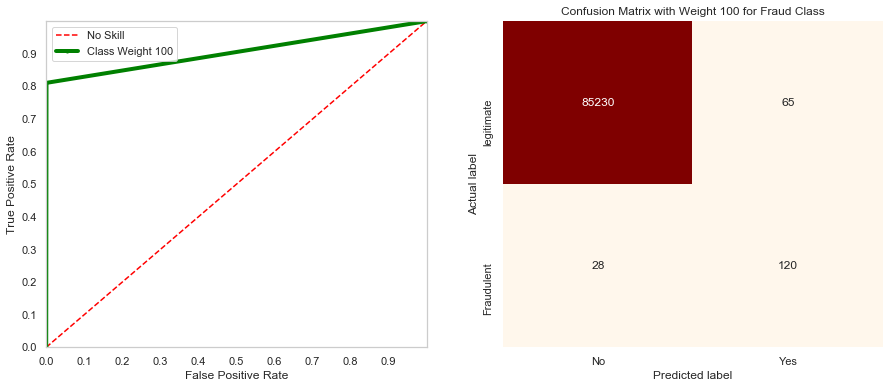

In [1306]:
calculate_and_plot(clf_dt_10,4,'Confusion Matrix with Weight 100 for Fraud Class','Class Weight 100','Decision Tree')

In [1208]:
clf_dt_100 =  create_csdt_classifier_model({0: 1.0, 1: 1000.0})
clf_dt_100 = clf_dt_100.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.998876
Precision: 0.638298
Sensitivity AKA Recall: 0.810811
F1 score: 0.714286
F2-Measure: 0.769231
ROC AUC: 0.905007
Legitimate Transactions Detected (True Negatives):  85227
Legitimate Transactions Incorrectly Detected (False Positives):  68
Fraudulent Transactions Missed (False Negatives):  28
Fraudulent Transactions Detected (True Positives):  120
Total Fraudulent Transactions in validation dataset:  148


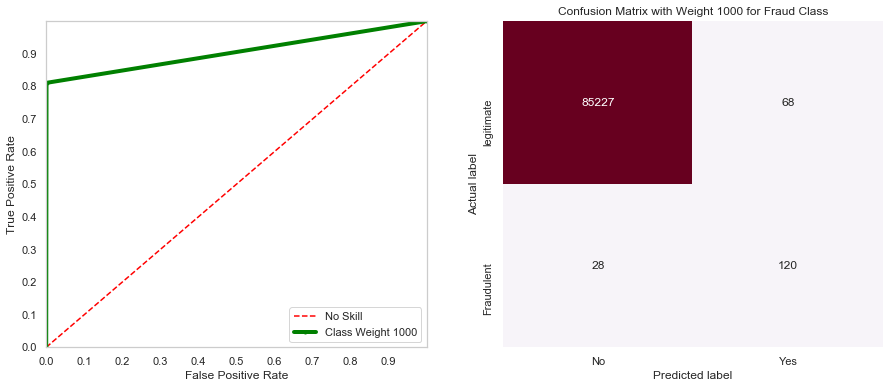

In [1307]:
calculate_and_plot(clf_dt_100,5,'Confusion Matrix with Weight 1000 for Fraud Class','Class Weight 1000','Decision Tree')

## Cost Sensitive Gradient Boosting XGBoost

In [1210]:
from xgboost import XGBClassifier

def create_xgb_classifier_model(scale_pos_weight):
    model = XGBClassifier(objective='binary:logistic',max_delta_step=5,scale_pos_weight=scale_pos_weight,max_depth=100)
    return model

In [1353]:
clf_xg_1 =  create_xgb_classifier_model(1)
clf_xg_1 = clf_xg_1.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.999345
Precision: 0.794872
Sensitivity AKA Recall: 0.837838
F1 score: 0.815789
F2-Measure: 0.828877
ROC AUC: 0.967556
Legitimate Transactions Detected (True Negatives):  85263
Legitimate Transactions Incorrectly Detected (False Positives):  32
Fraudulent Transactions Missed (False Negatives):  24
Fraudulent Transactions Detected (True Positives):  124
Total Fraudulent Transactions in validation dataset:  148


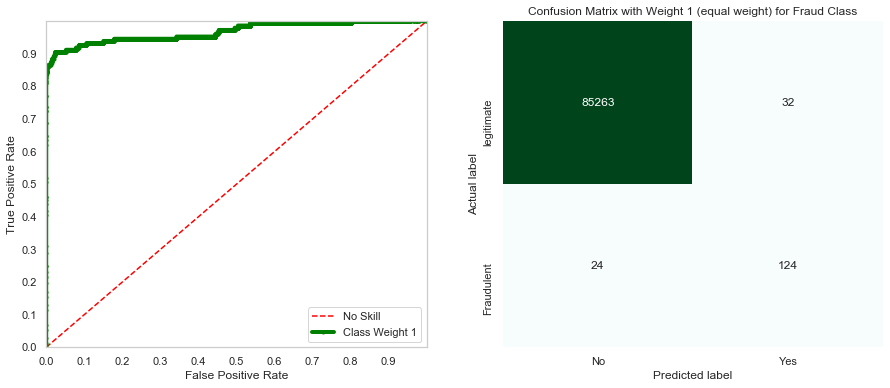

In [1354]:
calculate_and_plot(clf_xg_1,0,'Confusion Matrix with Weight 1 (equal weight) for Fraud Class','Class Weight 1','XGBoost')

In [1213]:
clf_xg_50 =  create_xgb_classifier_model(50)
clf_xg_50 = clf_xg_50.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.999146
Precision: 0.716763
Sensitivity AKA Recall: 0.837838
F1 score: 0.772586
F2-Measure: 0.810458
ROC AUC: 0.974359
Legitimate Transactions Detected (True Negatives):  85246
Legitimate Transactions Incorrectly Detected (False Positives):  49
Fraudulent Transactions Missed (False Negatives):  24
Fraudulent Transactions Detected (True Positives):  124
Total Fraudulent Transactions in validation dataset:  148


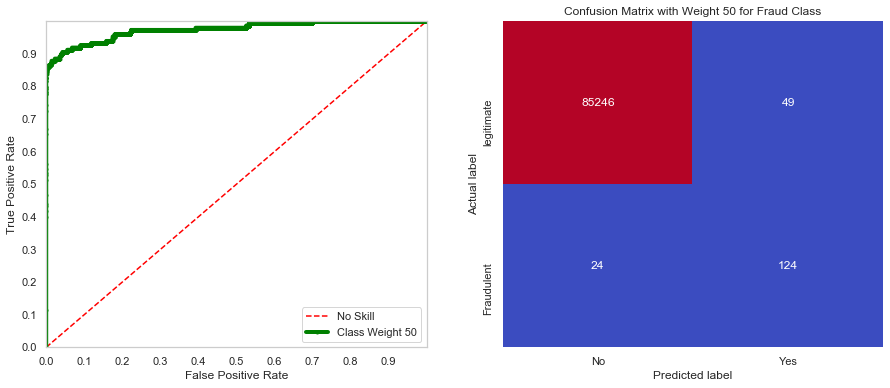

In [1309]:
calculate_and_plot(clf_xg_50,1,'Confusion Matrix with Weight 50 for Fraud Class','Class Weight 50','XGBoost')

In [1333]:
clf_xg_100 =  create_xgb_classifier_model(500)
clf_xg_100 = clf_xg_100.fit(trainX_scaled, trainy_scaled)

Accuracy: 0.998853
Precision: 0.626263
Sensitivity AKA Recall: 0.837838
F1 score: 0.716763
F2-Measure: 0.784810
ROC AUC: 0.957629
Legitimate Transactions Detected (True Negatives):  85221
Legitimate Transactions Incorrectly Detected (False Positives):  74
Fraudulent Transactions Missed (False Negatives):  24
Fraudulent Transactions Detected (True Positives):  124
Total Fraudulent Transactions in validation dataset:  148


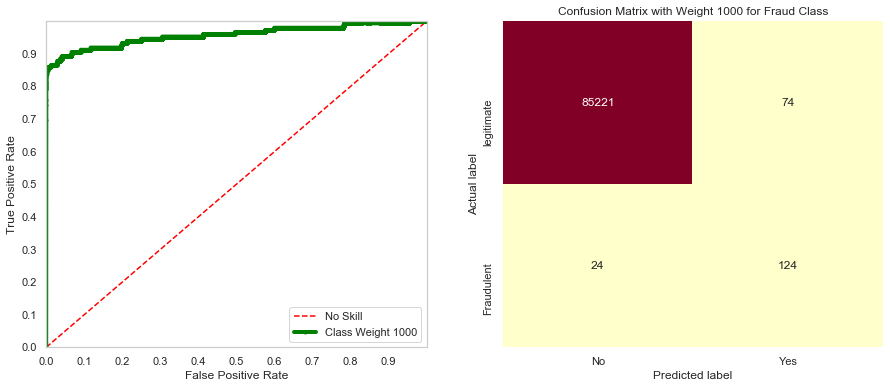

In [1310]:
calculate_and_plot(clf_xg_100,2,'Confusion Matrix with Weight 1000 for Fraud Class','Class Weight 1000','XGBoost')

## Cost Sensitive Artificial Neural Network

In [1217]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [1218]:
EPOCHS=200
BATCH_SIZE=1024

In [1219]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.SensitivityAtSpecificity(specificity=0.999,name='sensitivity'),
      keras.metrics.SpecificityAtSensitivity(sensitivity=0.8,name='specificity') 
]

In [1220]:
def make_model(metrics = METRICS, act_function='relu',output_bias=None):
    model = Sequential()
    # define first visible layer 
    model.add(Dense(trainX_scaled.shape[1],input_dim=trainX_scaled.shape[1],activation=act_function))
    model.add(Dropout(0.4))
    #tanh has steeper gradients, so backprop is more effective in cost sensitive weights which affect backpropagation
    # define first hidden layer 
    model.add(Dense(32, activation=act_function)) #number of neurons are kept to the power of 2
    model.add(Dropout(0.4))
    # define second hidden layer
    model.add(Dense(32, activation=act_function)) #number of neurons are kept to the power of 2
    model.add(Dropout(0.4))
    # define output layer
    model.add(Dense(1, activation='sigmoid'))
    # Cost sensitive weights to punish the false negatives
    # define loss and optimizer
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-3),metrics=METRICS)

    return model

In [1221]:
#We can see that val_tp does not vary through the iterations a lot. However, by focussing on FPs, we are increasing the precision and user experience
es = EarlyStopping(monitor='val_precision',mode='max', verbose=1, restore_best_weights= True, patience=100)

#tanh has steeper gradients, so backprop is more effective in cost sensitive weights which affect backpropagation
model_no_weight = make_model(act_function='tanh')

#tanh has steeper gradients, so backprop is more effective in cost sensitive weights which affect backpropagation
model_5_weight = make_model(act_function='tanh')

#tanh has steeper gradients, so backprop is more effective in cost sensitive weights which affect backpropagation
model_500_weight = make_model(act_function='tanh')

### Lets Run the 3 models

In [1222]:
run_no_weight_history = model_no_weight.fit(x=trainX_scaled,y=trainy_scaled,class_weight={0:1,1:1},validation_data=(testX,testy),batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=[es])

Train on 398040 samples, validate on 85443 samples
Epoch 1/200
398040/398040 [==============================] - 6s 14us/sample - loss: 0.1244 - tp: 194086.0000 - fp: 16250.0000 - tn: 182770.0000 - fn: 4934.0000 - accuracy: 0.9468 - precision: 0.9227 - recall: 0.9752 - auc: 0.9927 - sensitivity: 0.6358 - specificity: 0.9968 - val_loss: 0.0204 - val_tp: 127.0000 - val_fp: 422.0000 - val_tn: 84873.0000 - val_fn: 21.0000 - val_accuracy: 0.9948 - val_precision: 0.2313 - val_recall: 0.8581 - val_auc: 0.9391 - val_sensitivity: 0.8446 - val_specificity: 0.9992
Epoch 2/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0209 - tp: 198127.0000 - fp: 1516.0000 - tn: 197504.0000 - fn: 893.0000 - accuracy: 0.9939 - precision: 0.9924 - recall: 0.9955 - auc: 0.9992 - sensitivity: 0.8827 - specificity: 0.9990 - val_loss: 0.0198 - val_tp: 127.0000 - val_fp: 378.0000 - val_tn: 84917.0000 - val_fn: 21.0000 - val_accuracy: 0.9953 - val_precision: 0.2515 - val_recall: 0.8581 - val

398040/398040 [==============================] - 5s 12us/sample - loss: 0.0068 - tp: 198861.0000 - fp: 401.0000 - tn: 198619.0000 - fn: 159.0000 - accuracy: 0.9986 - precision: 0.9980 - recall: 0.9992 - auc: 0.9996 - sensitivity: 0.9938 - specificity: 0.9994 - val_loss: 0.0100 - val_tp: 126.0000 - val_fp: 128.0000 - val_tn: 85167.0000 - val_fn: 22.0000 - val_accuracy: 0.9982 - val_precision: 0.4961 - val_recall: 0.8514 - val_auc: 0.9250 - val_sensitivity: 0.8446 - val_specificity: 0.9993
Epoch 18/200
398040/398040 [==============================] - 5s 12us/sample - loss: 0.0070 - tp: 198857.0000 - fp: 391.0000 - tn: 198629.0000 - fn: 163.0000 - accuracy: 0.9986 - precision: 0.9980 - recall: 0.9992 - auc: 0.9995 - sensitivity: 0.9890 - specificity: 0.9993 - val_loss: 0.0110 - val_tp: 126.0000 - val_fp: 145.0000 - val_tn: 85150.0000 - val_fn: 22.0000 - val_accuracy: 0.9980 - val_precision: 0.4649 - val_recall: 0.8514 - val_auc: 0.9249 - val_sensitivity: 0.8514 - val_specificity: 0.9993
E

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0049 - tp: 198909.0000 - fp: 239.0000 - tn: 198781.0000 - fn: 111.0000 - accuracy: 0.9991 - precision: 0.9988 - recall: 0.9994 - auc: 0.9997 - sensitivity: 0.9991 - specificity: 0.9995 - val_loss: 0.0088 - val_tp: 125.0000 - val_fp: 99.0000 - val_tn: 85196.0000 - val_fn: 23.0000 - val_accuracy: 0.9986 - val_precision: 0.5580 - val_recall: 0.8446 - val_auc: 0.9285 - val_sensitivity: 0.8311 - val_specificity: 0.9994
Epoch 34/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0050 - tp: 198905.0000 - fp: 241.0000 - tn: 198779.0000 - fn: 115.0000 - accuracy: 0.9991 - precision: 0.9988 - recall: 0.9994 - auc: 0.9997 - sensitivity: 0.9990 - specificity: 0.9995 - val_loss: 0.0082 - val_tp: 123.0000 - val_fp: 83.0000 - val_tn: 85212.0000 - val_fn: 25.0000 - val_accuracy: 0.9987 - val_precision: 0.5971 - val_recall: 0.8311 - val_auc: 0.9251 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epo

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0042 - tp: 198941.0000 - fp: 188.0000 - tn: 198832.0000 - fn: 79.0000 - accuracy: 0.9993 - precision: 0.9991 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9996 - specificity: 0.9996 - val_loss: 0.0075 - val_tp: 123.0000 - val_fp: 64.0000 - val_tn: 85231.0000 - val_fn: 25.0000 - val_accuracy: 0.9990 - val_precision: 0.6578 - val_recall: 0.8311 - val_auc: 0.9252 - val_sensitivity: 0.8311 - val_specificity: 0.9994
Epoch 50/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0041 - tp: 198926.0000 - fp: 171.0000 - tn: 198849.0000 - fn: 94.0000 - accuracy: 0.9993 - precision: 0.9991 - recall: 0.9995 - auc: 0.9997 - sensitivity: 0.9997 - specificity: 0.9996 - val_loss: 0.0074 - val_tp: 123.0000 - val_fp: 63.0000 - val_tn: 85232.0000 - val_fn: 25.0000 - val_accuracy: 0.9990 - val_precision: 0.6613 - val_recall: 0.8311 - val_auc: 0.9252 - val_sensitivity: 0.8311 - val_specificity: 0.9994
Epoch

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0037 - tp: 198939.0000 - fp: 153.0000 - tn: 198867.0000 - fn: 81.0000 - accuracy: 0.9994 - precision: 0.9992 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9997 - specificity: 0.9996 - val_loss: 0.0079 - val_tp: 123.0000 - val_fp: 65.0000 - val_tn: 85230.0000 - val_fn: 25.0000 - val_accuracy: 0.9989 - val_precision: 0.6543 - val_recall: 0.8311 - val_auc: 0.9219 - val_sensitivity: 0.8378 - val_specificity: 0.9994
Epoch 66/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0038 - tp: 198950.0000 - fp: 164.0000 - tn: 198856.0000 - fn: 70.0000 - accuracy: 0.9994 - precision: 0.9992 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9997 - specificity: 0.9996 - val_loss: 0.0072 - val_tp: 123.0000 - val_fp: 53.0000 - val_tn: 85242.0000 - val_fn: 25.0000 - val_accuracy: 0.9991 - val_precision: 0.6989 - val_recall: 0.8311 - val_auc: 0.9219 - val_sensitivity: 0.8378 - val_specificity: 0.9995
Epoch

398040/398040 [==============================] - 5s 13us/sample - loss: 0.0037 - tp: 198940.0000 - fp: 148.0000 - tn: 198872.0000 - fn: 80.0000 - accuracy: 0.9994 - precision: 0.9993 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9997 - specificity: 0.9996 - val_loss: 0.0071 - val_tp: 123.0000 - val_fp: 54.0000 - val_tn: 85241.0000 - val_fn: 25.0000 - val_accuracy: 0.9991 - val_precision: 0.6949 - val_recall: 0.8311 - val_auc: 0.9253 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoch 82/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0037 - tp: 198936.0000 - fp: 141.0000 - tn: 198879.0000 - fn: 84.0000 - accuracy: 0.9994 - precision: 0.9993 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9997 - specificity: 0.9996 - val_loss: 0.0073 - val_tp: 123.0000 - val_fp: 54.0000 - val_tn: 85241.0000 - val_fn: 25.0000 - val_accuracy: 0.9991 - val_precision: 0.6949 - val_recall: 0.8311 - val_auc: 0.9219 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoch

398040/398040 [==============================] - 4s 11us/sample - loss: 0.0034 - tp: 198953.0000 - fp: 138.0000 - tn: 198882.0000 - fn: 67.0000 - accuracy: 0.9995 - precision: 0.9993 - recall: 0.9997 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9996 - val_loss: 0.0067 - val_tp: 123.0000 - val_fp: 43.0000 - val_tn: 85252.0000 - val_fn: 25.0000 - val_accuracy: 0.9992 - val_precision: 0.7410 - val_recall: 0.8311 - val_auc: 0.9220 - val_sensitivity: 0.8446 - val_specificity: 0.9995
Epoch 98/200
398040/398040 [==============================] - 4s 11us/sample - loss: 0.0035 - tp: 198950.0000 - fp: 128.0000 - tn: 198892.0000 - fn: 70.0000 - accuracy: 0.9995 - precision: 0.9994 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9997 - specificity: 0.9996 - val_loss: 0.0072 - val_tp: 123.0000 - val_fp: 52.0000 - val_tn: 85243.0000 - val_fn: 25.0000 - val_accuracy: 0.9991 - val_precision: 0.7029 - val_recall: 0.8311 - val_auc: 0.9219 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoch

398040/398040 [==============================] - 4s 11us/sample - loss: 0.0036 - tp: 198948.0000 - fp: 126.0000 - tn: 198894.0000 - fn: 72.0000 - accuracy: 0.9995 - precision: 0.9994 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9997 - specificity: 0.9996 - val_loss: 0.0067 - val_tp: 123.0000 - val_fp: 46.0000 - val_tn: 85249.0000 - val_fn: 25.0000 - val_accuracy: 0.9992 - val_precision: 0.7278 - val_recall: 0.8311 - val_auc: 0.9219 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoch 114/200
398040/398040 [==============================] - 5s 12us/sample - loss: 0.0035 - tp: 198946.0000 - fp: 124.0000 - tn: 198896.0000 - fn: 74.0000 - accuracy: 0.9995 - precision: 0.9994 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0070 - val_tp: 122.0000 - val_fp: 50.0000 - val_tn: 85245.0000 - val_fn: 26.0000 - val_accuracy: 0.9991 - val_precision: 0.7093 - val_recall: 0.8243 - val_auc: 0.9220 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoc

Epoch 129/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0033 - tp: 198952.0000 - fp: 116.0000 - tn: 198904.0000 - fn: 68.0000 - accuracy: 0.9995 - precision: 0.9994 - recall: 0.9997 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0067 - val_tp: 121.0000 - val_fp: 45.0000 - val_tn: 85250.0000 - val_fn: 27.0000 - val_accuracy: 0.9992 - val_precision: 0.7289 - val_recall: 0.8176 - val_auc: 0.9220 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoch 130/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0033 - tp: 198955.0000 - fp: 121.0000 - tn: 198899.0000 - fn: 65.0000 - accuracy: 0.9995 - precision: 0.9994 - recall: 0.9997 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0069 - val_tp: 122.0000 - val_fp: 43.0000 - val_tn: 85252.0000 - val_fn: 26.0000 - val_accuracy: 0.9992 - val_precision: 0.7394 - val_recall: 0.8243 - val_auc: 0.9220 - val_sensitivity: 0.8311 - val_specificit

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0032 - tp: 198956.0000 - fp: 106.0000 - tn: 198914.0000 - fn: 64.0000 - accuracy: 0.9996 - precision: 0.9995 - recall: 0.9997 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0068 - val_tp: 122.0000 - val_fp: 44.0000 - val_tn: 85251.0000 - val_fn: 26.0000 - val_accuracy: 0.9992 - val_precision: 0.7349 - val_recall: 0.8243 - val_auc: 0.9220 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoch 146/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0033 - tp: 198958.0000 - fp: 119.0000 - tn: 198901.0000 - fn: 62.0000 - accuracy: 0.9995 - precision: 0.9994 - recall: 0.9997 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0066 - val_tp: 122.0000 - val_fp: 41.0000 - val_tn: 85254.0000 - val_fn: 26.0000 - val_accuracy: 0.9992 - val_precision: 0.7485 - val_recall: 0.8243 - val_auc: 0.9186 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoc

398040/398040 [==============================] - 4s 11us/sample - loss: 0.0033 - tp: 198950.0000 - fp: 116.0000 - tn: 198904.0000 - fn: 70.0000 - accuracy: 0.9995 - precision: 0.9994 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0070 - val_tp: 122.0000 - val_fp: 53.0000 - val_tn: 85242.0000 - val_fn: 26.0000 - val_accuracy: 0.9991 - val_precision: 0.6971 - val_recall: 0.8243 - val_auc: 0.9220 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoch 162/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0032 - tp: 198957.0000 - fp: 108.0000 - tn: 198912.0000 - fn: 63.0000 - accuracy: 0.9996 - precision: 0.9995 - recall: 0.9997 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0068 - val_tp: 122.0000 - val_fp: 44.0000 - val_tn: 85251.0000 - val_fn: 26.0000 - val_accuracy: 0.9992 - val_precision: 0.7349 - val_recall: 0.8243 - val_auc: 0.9220 - val_sensitivity: 0.8311 - val_specificity: 0.9996
Epoc

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0032 - tp: 198958.0000 - fp: 112.0000 - tn: 198908.0000 - fn: 62.0000 - accuracy: 0.9996 - precision: 0.9994 - recall: 0.9997 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0068 - val_tp: 122.0000 - val_fp: 44.0000 - val_tn: 85251.0000 - val_fn: 26.0000 - val_accuracy: 0.9992 - val_precision: 0.7349 - val_recall: 0.8243 - val_auc: 0.9186 - val_sensitivity: 0.8311 - val_specificity: 0.9995
Epoch 178/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0033 - tp: 198947.0000 - fp: 111.0000 - tn: 198909.0000 - fn: 73.0000 - accuracy: 0.9995 - precision: 0.9994 - recall: 0.9996 - auc: 0.9997 - sensitivity: 0.9997 - specificity: 0.9997 - val_loss: 0.0068 - val_tp: 122.0000 - val_fp: 45.0000 - val_tn: 85250.0000 - val_fn: 26.0000 - val_accuracy: 0.9992 - val_precision: 0.7305 - val_recall: 0.8243 - val_auc: 0.9186 - val_sensitivity: 0.8311 - val_specificity: 0.9996
Epoc

Epoch 193/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0030 - tp: 198955.0000 - fp: 108.0000 - tn: 198912.0000 - fn: 65.0000 - accuracy: 0.9996 - precision: 0.9995 - recall: 0.9997 - auc: 0.9998 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0067 - val_tp: 122.0000 - val_fp: 41.0000 - val_tn: 85254.0000 - val_fn: 26.0000 - val_accuracy: 0.9992 - val_precision: 0.7485 - val_recall: 0.8243 - val_auc: 0.9187 - val_sensitivity: 0.8378 - val_specificity: 0.9995
Epoch 194/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0030 - tp: 198959.0000 - fp: 102.0000 - tn: 198918.0000 - fn: 61.0000 - accuracy: 0.9996 - precision: 0.9995 - recall: 0.9997 - auc: 0.9998 - sensitivity: 0.9998 - specificity: 0.9997 - val_loss: 0.0069 - val_tp: 122.0000 - val_fp: 42.0000 - val_tn: 85253.0000 - val_fn: 26.0000 - val_accuracy: 0.9992 - val_precision: 0.7439 - val_recall: 0.8243 - val_auc: 0.9153 - val_sensitivity: 0.8311 - val_specificit

In [1223]:
#cost_sensitive weights to punish to the false negatives
run_5_weight_history = model_5_weight.fit(x=trainX_scaled,y=trainy_scaled,class_weight={0:1,1:5},validation_data=(testX,testy),batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=[es])

Train on 398040 samples, validate on 85443 samples
Epoch 1/200
398040/398040 [==============================] - 5s 13us/sample - loss: 0.3123 - tp: 195595.0000 - fp: 34194.0000 - tn: 164826.0000 - fn: 3425.0000 - accuracy: 0.9055 - precision: 0.8512 - recall: 0.9828 - auc: 0.9866 - sensitivity: 0.5200 - specificity: 0.9915 - val_loss: 0.0457 - val_tp: 128.0000 - val_fp: 956.0000 - val_tn: 84339.0000 - val_fn: 20.0000 - val_accuracy: 0.9886 - val_precision: 0.1181 - val_recall: 0.8649 - val_auc: 0.9575 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9954
Epoch 2/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0424 - tp: 198755.0000 - fp: 3195.0000 - tn: 195825.0000 - fn: 265.0000 - accuracy: 0.9913 - precision: 0.9842 - recall: 0.9987 - auc: 0.9986 - sensitivity: 0.0000e+00 - specificity: 0.9978 - val_loss: 0.0342 - val_tp: 127.0000 - val_fp: 610.0000 - val_tn: 84685.0000 - val_fn: 21.0000 - val_accuracy: 0.9926 - val_precision: 0.1723 - val_recall: 0.85

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0145 - tp: 198949.0000 - fp: 682.0000 - tn: 198338.0000 - fn: 71.0000 - accuracy: 0.9981 - precision: 0.9966 - recall: 0.9996 - auc: 0.9993 - sensitivity: 0.9853 - specificity: 0.9988 - val_loss: 0.0179 - val_tp: 126.0000 - val_fp: 262.0000 - val_tn: 85033.0000 - val_fn: 22.0000 - val_accuracy: 0.9967 - val_precision: 0.3247 - val_recall: 0.8514 - val_auc: 0.9307 - val_sensitivity: 0.8446 - val_specificity: 0.9972
Epoch 18/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0141 - tp: 198951.0000 - fp: 644.0000 - tn: 198376.0000 - fn: 69.0000 - accuracy: 0.9982 - precision: 0.9968 - recall: 0.9997 - auc: 0.9993 - sensitivity: 0.9860 - specificity: 0.9989 - val_loss: 0.0160 - val_tp: 125.0000 - val_fp: 213.0000 - val_tn: 85082.0000 - val_fn: 23.0000 - val_accuracy: 0.9972 - val_precision: 0.3698 - val_recall: 0.8446 - val_auc: 0.9308 - val_sensitivity: 0.8446 - val_specificity: 0.9966
Epo

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0109 - tp: 198967.0000 - fp: 399.0000 - tn: 198621.0000 - fn: 53.0000 - accuracy: 0.9989 - precision: 0.9980 - recall: 0.9997 - auc: 0.9995 - sensitivity: 0.9955 - specificity: 0.9991 - val_loss: 0.0136 - val_tp: 125.0000 - val_fp: 149.0000 - val_tn: 85146.0000 - val_fn: 23.0000 - val_accuracy: 0.9980 - val_precision: 0.4562 - val_recall: 0.8446 - val_auc: 0.9247 - val_sensitivity: 0.8378 - val_specificity: 0.9986
Epoch 34/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0105 - tp: 198968.0000 - fp: 398.0000 - tn: 198622.0000 - fn: 52.0000 - accuracy: 0.9989 - precision: 0.9980 - recall: 0.9997 - auc: 0.9995 - sensitivity: 0.9977 - specificity: 0.9992 - val_loss: 0.0115 - val_tp: 125.0000 - val_fp: 114.0000 - val_tn: 85181.0000 - val_fn: 23.0000 - val_accuracy: 0.9984 - val_precision: 0.5230 - val_recall: 0.8446 - val_auc: 0.9249 - val_sensitivity: 0.8378 - val_specificity: 0.9988
Epo

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0096 - tp: 198972.0000 - fp: 326.0000 - tn: 198694.0000 - fn: 48.0000 - accuracy: 0.9991 - precision: 0.9984 - recall: 0.9998 - auc: 0.9995 - sensitivity: 0.9988 - specificity: 0.9992 - val_loss: 0.0122 - val_tp: 124.0000 - val_fp: 120.0000 - val_tn: 85175.0000 - val_fn: 24.0000 - val_accuracy: 0.9983 - val_precision: 0.5082 - val_recall: 0.8378 - val_auc: 0.9249 - val_sensitivity: 0.8378 - val_specificity: 0.9985
Epoch 50/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0097 - tp: 198968.0000 - fp: 310.0000 - tn: 198710.0000 - fn: 52.0000 - accuracy: 0.9991 - precision: 0.9984 - recall: 0.9997 - auc: 0.9995 - sensitivity: 0.9991 - specificity: 0.9992 - val_loss: 0.0109 - val_tp: 124.0000 - val_fp: 107.0000 - val_tn: 85188.0000 - val_fn: 24.0000 - val_accuracy: 0.9985 - val_precision: 0.5368 - val_recall: 0.8378 - val_auc: 0.9282 - val_sensitivity: 0.8378 - val_specificity: 0.9986
Epo

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0089 - tp: 198972.0000 - fp: 284.0000 - tn: 198736.0000 - fn: 48.0000 - accuracy: 0.9992 - precision: 0.9986 - recall: 0.9998 - auc: 0.9996 - sensitivity: 0.9995 - specificity: 0.9993 - val_loss: 0.0106 - val_tp: 124.0000 - val_fp: 102.0000 - val_tn: 85193.0000 - val_fn: 24.0000 - val_accuracy: 0.9985 - val_precision: 0.5487 - val_recall: 0.8378 - val_auc: 0.9283 - val_sensitivity: 0.8378 - val_specificity: 0.9992
Epoch 66/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0090 - tp: 198975.0000 - fp: 285.0000 - tn: 198735.0000 - fn: 45.0000 - accuracy: 0.9992 - precision: 0.9986 - recall: 0.9998 - auc: 0.9996 - sensitivity: 0.9995 - specificity: 0.9994 - val_loss: 0.0103 - val_tp: 124.0000 - val_fp: 96.0000 - val_tn: 85199.0000 - val_fn: 24.0000 - val_accuracy: 0.9986 - val_precision: 0.5636 - val_recall: 0.8378 - val_auc: 0.9250 - val_sensitivity: 0.8378 - val_specificity: 0.9991
Epoc

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0085 - tp: 198974.0000 - fp: 254.0000 - tn: 198766.0000 - fn: 46.0000 - accuracy: 0.9992 - precision: 0.9987 - recall: 0.9998 - auc: 0.9996 - sensitivity: 0.9997 - specificity: 0.9994 - val_loss: 0.0099 - val_tp: 124.0000 - val_fp: 91.0000 - val_tn: 85204.0000 - val_fn: 24.0000 - val_accuracy: 0.9987 - val_precision: 0.5767 - val_recall: 0.8378 - val_auc: 0.9284 - val_sensitivity: 0.8311 - val_specificity: 0.9989
Epoch 82/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0088 - tp: 198973.0000 - fp: 267.0000 - tn: 198753.0000 - fn: 47.0000 - accuracy: 0.9992 - precision: 0.9987 - recall: 0.9998 - auc: 0.9996 - sensitivity: 0.9996 - specificity: 0.9994 - val_loss: 0.0095 - val_tp: 124.0000 - val_fp: 84.0000 - val_tn: 85211.0000 - val_fn: 24.0000 - val_accuracy: 0.9987 - val_precision: 0.5962 - val_recall: 0.8378 - val_auc: 0.9285 - val_sensitivity: 0.8378 - val_specificity: 0.9991
Epoch

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0083 - tp: 198978.0000 - fp: 241.0000 - tn: 198779.0000 - fn: 42.0000 - accuracy: 0.9993 - precision: 0.9988 - recall: 0.9998 - auc: 0.9996 - sensitivity: 0.9997 - specificity: 0.9994 - val_loss: 0.0093 - val_tp: 123.0000 - val_fp: 78.0000 - val_tn: 85217.0000 - val_fn: 25.0000 - val_accuracy: 0.9988 - val_precision: 0.6119 - val_recall: 0.8311 - val_auc: 0.9251 - val_sensitivity: 0.8311 - val_specificity: 0.9990
Epoch 98/200
398040/398040 [==============================] - 5s 11us/sample - loss: 0.0081 - tp: 198975.0000 - fp: 241.0000 - tn: 198779.0000 - fn: 45.0000 - accuracy: 0.9993 - precision: 0.9988 - recall: 0.9998 - auc: 0.9996 - sensitivity: 0.9997 - specificity: 0.9994 - val_loss: 0.0106 - val_tp: 123.0000 - val_fp: 98.0000 - val_tn: 85197.0000 - val_fn: 25.0000 - val_accuracy: 0.9986 - val_precision: 0.5566 - val_recall: 0.8311 - val_auc: 0.9283 - val_sensitivity: 0.8311 - val_specificity: 0.9989
Epoch

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0076 - tp: 198980.0000 - fp: 208.0000 - tn: 198812.0000 - fn: 40.0000 - accuracy: 0.9994 - precision: 0.9990 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9995 - val_loss: 0.0101 - val_tp: 123.0000 - val_fp: 95.0000 - val_tn: 85200.0000 - val_fn: 25.0000 - val_accuracy: 0.9986 - val_precision: 0.5642 - val_recall: 0.8311 - val_auc: 0.9251 - val_sensitivity: 0.8311 - val_specificity: 0.9989
Epoch 114/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0080 - tp: 198977.0000 - fp: 212.0000 - tn: 198808.0000 - fn: 43.0000 - accuracy: 0.9994 - precision: 0.9989 - recall: 0.9998 - auc: 0.9996 - sensitivity: 0.9998 - specificity: 0.9994 - val_loss: 0.0102 - val_tp: 123.0000 - val_fp: 89.0000 - val_tn: 85206.0000 - val_fn: 25.0000 - val_accuracy: 0.9987 - val_precision: 0.5802 - val_recall: 0.8311 - val_auc: 0.9318 - val_sensitivity: 0.8311 - val_specificity: 0.9989
Epoc

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0078 - tp: 198971.0000 - fp: 230.0000 - tn: 198790.0000 - fn: 49.0000 - accuracy: 0.9993 - precision: 0.9988 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9997 - specificity: 0.9995 - val_loss: 0.0093 - val_tp: 123.0000 - val_fp: 80.0000 - val_tn: 85215.0000 - val_fn: 25.0000 - val_accuracy: 0.9988 - val_precision: 0.6059 - val_recall: 0.8311 - val_auc: 0.9285 - val_sensitivity: 0.8311 - val_specificity: 0.9987
Epoch 130/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0080 - tp: 198976.0000 - fp: 228.0000 - tn: 198792.0000 - fn: 44.0000 - accuracy: 0.9993 - precision: 0.9989 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9995 - val_loss: 0.0093 - val_tp: 123.0000 - val_fp: 77.0000 - val_tn: 85218.0000 - val_fn: 25.0000 - val_accuracy: 0.9988 - val_precision: 0.6150 - val_recall: 0.8311 - val_auc: 0.9251 - val_sensitivity: 0.8311 - val_specificity: 0.9987
Epoc

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0077 - tp: 198977.0000 - fp: 201.0000 - tn: 198819.0000 - fn: 43.0000 - accuracy: 0.9994 - precision: 0.9990 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9995 - val_loss: 0.0091 - val_tp: 123.0000 - val_fp: 73.0000 - val_tn: 85222.0000 - val_fn: 25.0000 - val_accuracy: 0.9989 - val_precision: 0.6276 - val_recall: 0.8311 - val_auc: 0.9251 - val_sensitivity: 0.8311 - val_specificity: 0.9989
Epoch 146/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0078 - tp: 198974.0000 - fp: 219.0000 - tn: 198801.0000 - fn: 46.0000 - accuracy: 0.9993 - precision: 0.9989 - recall: 0.9998 - auc: 0.9996 - sensitivity: 0.9997 - specificity: 0.9994 - val_loss: 0.0083 - val_tp: 123.0000 - val_fp: 68.0000 - val_tn: 85227.0000 - val_fn: 25.0000 - val_accuracy: 0.9989 - val_precision: 0.6440 - val_recall: 0.8311 - val_auc: 0.9218 - val_sensitivity: 0.8311 - val_specificity: 0.9989
Epoc

398040/398040 [==============================] - 4s 11us/sample - loss: 0.0077 - tp: 198979.0000 - fp: 207.0000 - tn: 198813.0000 - fn: 41.0000 - accuracy: 0.9994 - precision: 0.9990 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9995 - val_loss: 0.0085 - val_tp: 123.0000 - val_fp: 68.0000 - val_tn: 85227.0000 - val_fn: 25.0000 - val_accuracy: 0.9989 - val_precision: 0.6440 - val_recall: 0.8311 - val_auc: 0.9286 - val_sensitivity: 0.8311 - val_specificity: 0.9989
Epoch 162/200
398040/398040 [==============================] - 5s 12us/sample - loss: 0.0075 - tp: 198976.0000 - fp: 212.0000 - tn: 198808.0000 - fn: 44.0000 - accuracy: 0.9994 - precision: 0.9989 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9995 - val_loss: 0.0086 - val_tp: 123.0000 - val_fp: 73.0000 - val_tn: 85222.0000 - val_fn: 25.0000 - val_accuracy: 0.9989 - val_precision: 0.6276 - val_recall: 0.8311 - val_auc: 0.9252 - val_sensitivity: 0.8311 - val_specificity: 0.9988
Epoc

398040/398040 [==============================] - 5s 12us/sample - loss: 0.0072 - tp: 198977.0000 - fp: 194.0000 - tn: 198826.0000 - fn: 43.0000 - accuracy: 0.9994 - precision: 0.9990 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9995 - val_loss: 0.0093 - val_tp: 123.0000 - val_fp: 75.0000 - val_tn: 85220.0000 - val_fn: 25.0000 - val_accuracy: 0.9988 - val_precision: 0.6212 - val_recall: 0.8311 - val_auc: 0.9252 - val_sensitivity: 0.8311 - val_specificity: 0.9989
Epoch 178/200
398040/398040 [==============================] - 4s 11us/sample - loss: 0.0077 - tp: 198976.0000 - fp: 217.0000 - tn: 198803.0000 - fn: 44.0000 - accuracy: 0.9993 - precision: 0.9989 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9995 - val_loss: 0.0097 - val_tp: 124.0000 - val_fp: 81.0000 - val_tn: 85214.0000 - val_fn: 24.0000 - val_accuracy: 0.9988 - val_precision: 0.6049 - val_recall: 0.8378 - val_auc: 0.9285 - val_sensitivity: 0.8378 - val_specificity: 0.9991
Epoc

398040/398040 [==============================] - 4s 10us/sample - loss: 0.0072 - tp: 198981.0000 - fp: 193.0000 - tn: 198827.0000 - fn: 39.0000 - accuracy: 0.9994 - precision: 0.9990 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9995 - val_loss: 0.0086 - val_tp: 123.0000 - val_fp: 65.0000 - val_tn: 85230.0000 - val_fn: 25.0000 - val_accuracy: 0.9989 - val_precision: 0.6543 - val_recall: 0.8311 - val_auc: 0.9218 - val_sensitivity: 0.8311 - val_specificity: 0.9990
Epoch 194/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0072 - tp: 198978.0000 - fp: 186.0000 - tn: 198834.0000 - fn: 42.0000 - accuracy: 0.9994 - precision: 0.9991 - recall: 0.9998 - auc: 0.9997 - sensitivity: 0.9998 - specificity: 0.9995 - val_loss: 0.0084 - val_tp: 123.0000 - val_fp: 59.0000 - val_tn: 85236.0000 - val_fn: 25.0000 - val_accuracy: 0.9990 - val_precision: 0.6758 - val_recall: 0.8311 - val_auc: 0.9218 - val_sensitivity: 0.8378 - val_specificity: 0.9991
Epoc

In [1224]:
#cost_sensitive weights to punish to the false negatives
run_500_weight_history = model_500_weight.fit(x=trainX_scaled,y=trainy_scaled,class_weight={0:1,1:500},validation_data=(testX,testy),batch_size=BATCH_SIZE,epochs=EPOCHS)#,callbacks=[es])

Train on 398040 samples, validate on 85443 samples
Epoch 1/200
398040/398040 [==============================] - 5s 14us/sample - loss: 12.3821 - tp: 195687.0000 - fp: 121798.0000 - tn: 77222.0000 - fn: 3333.0000 - accuracy: 0.6856 - precision: 0.6164 - recall: 0.9833 - auc: 0.9135 - sensitivity: 0.0000e+00 - specificity: 0.8833 - val_loss: 1.6347 - val_tp: 148.0000 - val_fp: 43660.0000 - val_tn: 41635.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.4890 - val_precision: 0.0034 - val_recall: 1.0000 - val_auc: 0.9349 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9151
Epoch 2/200
398040/398040 [==============================] - 4s 11us/sample - loss: 1.0265 - tp: 199011.0000 - fp: 81463.0000 - tn: 117557.0000 - fn: 9.0000 - accuracy: 0.7953 - precision: 0.7096 - recall: 1.0000 - auc: 0.9621 - sensitivity: 0.0000e+00 - specificity: 0.9299 - val_loss: 0.8463 - val_tp: 139.0000 - val_fp: 18931.0000 - val_tn: 66364.0000 - val_fn: 9.0000 - val_accuracy: 0.7783 - val_precision: 0.0073 - val_re

Epoch 17/200
398040/398040 [==============================] - 4s 11us/sample - loss: 0.2721 - tp: 198996.0000 - fp: 11764.0000 - tn: 187256.0000 - fn: 24.0000 - accuracy: 0.9704 - precision: 0.9442 - recall: 0.9999 - auc: 0.9933 - sensitivity: 0.0000e+00 - specificity: 0.9867 - val_loss: 0.1669 - val_tp: 135.0000 - val_fp: 3394.0000 - val_tn: 81901.0000 - val_fn: 13.0000 - val_accuracy: 0.9601 - val_precision: 0.0383 - val_recall: 0.9122 - val_auc: 0.9611 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9902
Epoch 18/200
398040/398040 [==============================] - 4s 11us/sample - loss: 0.2546 - tp: 199001.0000 - fp: 11473.0000 - tn: 187547.0000 - fn: 19.0000 - accuracy: 0.9711 - precision: 0.9455 - recall: 0.9999 - auc: 0.9937 - sensitivity: 0.0000e+00 - specificity: 0.9876 - val_loss: 0.1582 - val_tp: 135.0000 - val_fp: 2877.0000 - val_tn: 82418.0000 - val_fn: 13.0000 - val_accuracy: 0.9662 - val_precision: 0.0448 - val_recall: 0.9122 - val_auc: 0.9611 - val_sensitivity: 0.000

Epoch 33/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1832 - tp: 199003.0000 - fp: 10066.0000 - tn: 188954.0000 - fn: 17.0000 - accuracy: 0.9747 - precision: 0.9519 - recall: 0.9999 - auc: 0.9960 - sensitivity: 0.0000e+00 - specificity: 0.9920 - val_loss: 0.1138 - val_tp: 131.0000 - val_fp: 1816.0000 - val_tn: 83479.0000 - val_fn: 17.0000 - val_accuracy: 0.9785 - val_precision: 0.0673 - val_recall: 0.8851 - val_auc: 0.9626 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9925
Epoch 34/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1893 - tp: 198999.0000 - fp: 8628.0000 - tn: 190392.0000 - fn: 21.0000 - accuracy: 0.9783 - precision: 0.9584 - recall: 0.9999 - auc: 0.9958 - sensitivity: 0.0000e+00 - specificity: 0.9917 - val_loss: 0.1148 - val_tp: 132.0000 - val_fp: 1782.0000 - val_tn: 83513.0000 - val_fn: 16.0000 - val_accuracy: 0.9790 - val_precision: 0.0690 - val_recall: 0.8919 - val_auc: 0.9642 - val_sensitivity: 0.0000

Epoch 49/200
398040/398040 [==============================] - 4s 11us/sample - loss: 0.1566 - tp: 199002.0000 - fp: 8293.0000 - tn: 190727.0000 - fn: 18.0000 - accuracy: 0.9791 - precision: 0.9600 - recall: 0.9999 - auc: 0.9965 - sensitivity: 0.0000e+00 - specificity: 0.9930 - val_loss: 0.0966 - val_tp: 132.0000 - val_fp: 1553.0000 - val_tn: 83742.0000 - val_fn: 16.0000 - val_accuracy: 0.9816 - val_precision: 0.0783 - val_recall: 0.8919 - val_auc: 0.9625 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9922
Epoch 50/200
398040/398040 [==============================] - 4s 11us/sample - loss: 0.1745 - tp: 198998.0000 - fp: 8141.0000 - tn: 190879.0000 - fn: 22.0000 - accuracy: 0.9795 - precision: 0.9607 - recall: 0.9999 - auc: 0.9966 - sensitivity: 0.0000e+00 - specificity: 0.9933 - val_loss: 0.1090 - val_tp: 133.0000 - val_fp: 1973.0000 - val_tn: 83322.0000 - val_fn: 15.0000 - val_accuracy: 0.9767 - val_precision: 0.0632 - val_recall: 0.8986 - val_auc: 0.9643 - val_sensitivity: 0.0000e

Epoch 65/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1466 - tp: 199003.0000 - fp: 7565.0000 - tn: 191455.0000 - fn: 17.0000 - accuracy: 0.9810 - precision: 0.9634 - recall: 0.9999 - auc: 0.9970 - sensitivity: 0.0000e+00 - specificity: 0.9939 - val_loss: 0.1066 - val_tp: 132.0000 - val_fp: 1971.0000 - val_tn: 83324.0000 - val_fn: 16.0000 - val_accuracy: 0.9767 - val_precision: 0.0628 - val_recall: 0.8919 - val_auc: 0.9601 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9905
Epoch 66/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1410 - tp: 199005.0000 - fp: 8330.0000 - tn: 190690.0000 - fn: 15.0000 - accuracy: 0.9790 - precision: 0.9598 - recall: 0.9999 - auc: 0.9969 - sensitivity: 0.0000e+00 - specificity: 0.9938 - val_loss: 0.0914 - val_tp: 131.0000 - val_fp: 1538.0000 - val_tn: 83757.0000 - val_fn: 17.0000 - val_accuracy: 0.9818 - val_precision: 0.0785 - val_recall: 0.8851 - val_auc: 0.9609 - val_sensitivity: 0.0000e

Epoch 81/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1297 - tp: 199004.0000 - fp: 7558.0000 - tn: 191462.0000 - fn: 16.0000 - accuracy: 0.9810 - precision: 0.9634 - recall: 0.9999 - auc: 0.9972 - sensitivity: 0.0000e+00 - specificity: 0.9945 - val_loss: 0.0862 - val_tp: 132.0000 - val_fp: 1557.0000 - val_tn: 83738.0000 - val_fn: 16.0000 - val_accuracy: 0.9816 - val_precision: 0.0782 - val_recall: 0.8919 - val_auc: 0.9620 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9909
Epoch 82/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1477 - tp: 199003.0000 - fp: 7992.0000 - tn: 191028.0000 - fn: 17.0000 - accuracy: 0.9799 - precision: 0.9614 - recall: 0.9999 - auc: 0.9966 - sensitivity: 0.0000e+00 - specificity: 0.9933 - val_loss: 0.0981 - val_tp: 132.0000 - val_fp: 1971.0000 - val_tn: 83324.0000 - val_fn: 16.0000 - val_accuracy: 0.9767 - val_precision: 0.0628 - val_recall: 0.8919 - val_auc: 0.9616 - val_sensitivity: 0.0000e

Epoch 97/200
398040/398040 [==============================] - 4s 11us/sample - loss: 0.1161 - tp: 199003.0000 - fp: 7322.0000 - tn: 191698.0000 - fn: 17.0000 - accuracy: 0.9816 - precision: 0.9645 - recall: 0.9999 - auc: 0.9974 - sensitivity: 0.0000e+00 - specificity: 0.9949 - val_loss: 0.0882 - val_tp: 132.0000 - val_fp: 1574.0000 - val_tn: 83721.0000 - val_fn: 16.0000 - val_accuracy: 0.9814 - val_precision: 0.0774 - val_recall: 0.8919 - val_auc: 0.9597 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9921
Epoch 98/200
398040/398040 [==============================] - 5s 12us/sample - loss: 0.1337 - tp: 199004.0000 - fp: 7354.0000 - tn: 191666.0000 - fn: 16.0000 - accuracy: 0.9815 - precision: 0.9644 - recall: 0.9999 - auc: 0.9971 - sensitivity: 0.0000e+00 - specificity: 0.9943 - val_loss: 0.0861 - val_tp: 132.0000 - val_fp: 1674.0000 - val_tn: 83621.0000 - val_fn: 16.0000 - val_accuracy: 0.9802 - val_precision: 0.0731 - val_recall: 0.8919 - val_auc: 0.9592 - val_sensitivity: 0.0000e

Epoch 113/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1230 - tp: 199000.0000 - fp: 6943.0000 - tn: 192077.0000 - fn: 20.0000 - accuracy: 0.9825 - precision: 0.9663 - recall: 0.9999 - auc: 0.9976 - sensitivity: 0.0000e+00 - specificity: 0.9952 - val_loss: 0.0920 - val_tp: 131.0000 - val_fp: 1623.0000 - val_tn: 83672.0000 - val_fn: 17.0000 - val_accuracy: 0.9808 - val_precision: 0.0747 - val_recall: 0.8851 - val_auc: 0.9613 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9933
Epoch 114/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1333 - tp: 199002.0000 - fp: 7270.0000 - tn: 191750.0000 - fn: 18.0000 - accuracy: 0.9817 - precision: 0.9648 - recall: 0.9999 - auc: 0.9974 - sensitivity: 0.0000e+00 - specificity: 0.9947 - val_loss: 0.0772 - val_tp: 131.0000 - val_fp: 1457.0000 - val_tn: 83838.0000 - val_fn: 17.0000 - val_accuracy: 0.9827 - val_precision: 0.0825 - val_recall: 0.8851 - val_auc: 0.9621 - val_sensitivity: 0.000

398040/398040 [==============================] - 4s 11us/sample - loss: 0.1127 - tp: 199004.0000 - fp: 6701.0000 - tn: 192319.0000 - fn: 16.0000 - accuracy: 0.9831 - precision: 0.9674 - recall: 0.9999 - auc: 0.9975 - sensitivity: 0.0000e+00 - specificity: 0.9951 - val_loss: 0.0942 - val_tp: 132.0000 - val_fp: 1886.0000 - val_tn: 83409.0000 - val_fn: 16.0000 - val_accuracy: 0.9777 - val_precision: 0.0654 - val_recall: 0.8919 - val_auc: 0.9593 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9941
Epoch 129/200
398040/398040 [==============================] - 4s 11us/sample - loss: 0.1031 - tp: 199010.0000 - fp: 7398.0000 - tn: 191622.0000 - fn: 10.0000 - accuracy: 0.9814 - precision: 0.9642 - recall: 0.9999 - auc: 0.9975 - sensitivity: 0.0000e+00 - specificity: 0.9950 - val_loss: 0.0792 - val_tp: 130.0000 - val_fp: 1341.0000 - val_tn: 83954.0000 - val_fn: 18.0000 - val_accuracy: 0.9841 - val_precision: 0.0884 - val_recall: 0.8784 - val_auc: 0.9609 - val_sensitivity: 0.0000e+00 - val_sp

Epoch 144/200
398040/398040 [==============================] - 5s 11us/sample - loss: 0.1117 - tp: 199003.0000 - fp: 6353.0000 - tn: 192667.0000 - fn: 17.0000 - accuracy: 0.9840 - precision: 0.9691 - recall: 0.9999 - auc: 0.9975 - sensitivity: 0.0000e+00 - specificity: 0.9951 - val_loss: 0.0869 - val_tp: 132.0000 - val_fp: 1572.0000 - val_tn: 83723.0000 - val_fn: 16.0000 - val_accuracy: 0.9814 - val_precision: 0.0775 - val_recall: 0.8919 - val_auc: 0.9646 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9941
Epoch 145/200
398040/398040 [==============================] - 5s 12us/sample - loss: 0.1055 - tp: 199008.0000 - fp: 6833.0000 - tn: 192187.0000 - fn: 12.0000 - accuracy: 0.9828 - precision: 0.9668 - recall: 0.9999 - auc: 0.9975 - sensitivity: 0.0000e+00 - specificity: 0.9950 - val_loss: 0.0884 - val_tp: 131.0000 - val_fp: 1389.0000 - val_tn: 83906.0000 - val_fn: 17.0000 - val_accuracy: 0.9835 - val_precision: 0.0862 - val_recall: 0.8851 - val_auc: 0.9600 - val_sensitivity: 0.000

Epoch 160/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1071 - tp: 199005.0000 - fp: 6310.0000 - tn: 192710.0000 - fn: 15.0000 - accuracy: 0.9841 - precision: 0.9693 - recall: 0.9999 - auc: 0.9977 - sensitivity: 0.0000e+00 - specificity: 0.9954 - val_loss: 0.0810 - val_tp: 130.0000 - val_fp: 1441.0000 - val_tn: 83854.0000 - val_fn: 18.0000 - val_accuracy: 0.9829 - val_precision: 0.0827 - val_recall: 0.8784 - val_auc: 0.9586 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9951
Epoch 161/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.0988 - tp: 199008.0000 - fp: 5703.0000 - tn: 193317.0000 - fn: 12.0000 - accuracy: 0.9856 - precision: 0.9721 - recall: 0.9999 - auc: 0.9978 - sensitivity: 0.0000e+00 - specificity: 0.9957 - val_loss: 0.0747 - val_tp: 130.0000 - val_fp: 1152.0000 - val_tn: 84143.0000 - val_fn: 18.0000 - val_accuracy: 0.9863 - val_precision: 0.1014 - val_recall: 0.8784 - val_auc: 0.9601 - val_sensitivity: 0.000

Epoch 176/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1106 - tp: 199007.0000 - fp: 6206.0000 - tn: 192814.0000 - fn: 13.0000 - accuracy: 0.9844 - precision: 0.9698 - recall: 0.9999 - auc: 0.9977 - sensitivity: 0.0000e+00 - specificity: 0.9954 - val_loss: 0.0664 - val_tp: 131.0000 - val_fp: 1157.0000 - val_tn: 84138.0000 - val_fn: 17.0000 - val_accuracy: 0.9863 - val_precision: 0.1017 - val_recall: 0.8851 - val_auc: 0.9626 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9966
Epoch 177/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1023 - tp: 199008.0000 - fp: 5996.0000 - tn: 193024.0000 - fn: 12.0000 - accuracy: 0.9849 - precision: 0.9708 - recall: 0.9999 - auc: 0.9975 - sensitivity: 0.0000e+00 - specificity: 0.9951 - val_loss: 0.0721 - val_tp: 131.0000 - val_fp: 1273.0000 - val_tn: 84022.0000 - val_fn: 17.0000 - val_accuracy: 0.9849 - val_precision: 0.0933 - val_recall: 0.8851 - val_auc: 0.9656 - val_sensitivity: 0.000

Epoch 192/200
398040/398040 [==============================] - 4s 11us/sample - loss: 0.1151 - tp: 199001.0000 - fp: 6215.0000 - tn: 192805.0000 - fn: 19.0000 - accuracy: 0.9843 - precision: 0.9697 - recall: 0.9999 - auc: 0.9980 - sensitivity: 0.0000e+00 - specificity: 0.9960 - val_loss: 0.0692 - val_tp: 131.0000 - val_fp: 1344.0000 - val_tn: 83951.0000 - val_fn: 17.0000 - val_accuracy: 0.9841 - val_precision: 0.0888 - val_recall: 0.8851 - val_auc: 0.9664 - val_sensitivity: 0.0000e+00 - val_specificity: 0.9968
Epoch 193/200
398040/398040 [==============================] - 4s 10us/sample - loss: 0.1267 - tp: 199000.0000 - fp: 7322.0000 - tn: 191698.0000 - fn: 20.0000 - accuracy: 0.9816 - precision: 0.9645 - recall: 0.9999 - auc: 0.9975 - sensitivity: 0.0000e+00 - specificity: 0.9950 - val_loss: 0.0735 - val_tp: 131.0000 - val_fp: 1393.0000 - val_tn: 83902.0000 - val_fn: 17.0000 - val_accuracy: 0.9835 - val_precision: 0.0860 - val_recall: 0.8851 - val_auc: 0.9654 - val_sensitivity: 0.000

In [1311]:
run_data = []
run_data.append(run_no_weight_history)
run_data.append(run_5_weight_history)
run_data.append(run_500_weight_history)

In [1312]:
import matplotlib.pyplot as plt
def plot_data(run_data,train_param,test_param,xstep,yrangestart,yrangeend,ystep,title,ylabel,xlabel,legend,loc='upper right'):
    plt.figure(figsize=(10,10),facecolor='w')
    colorMap = ['red','blue','green']
    colorCounter = 0
    for hist_data in run_data: 
        plt.plot(hist_data.history[train_param],color=colorMap[colorCounter])
        plt.plot(hist_data.history[test_param],color=colorMap[colorCounter], linestyle="dotted")
        colorCounter = colorCounter + 1
    plt.xticks(np.arange(0, EPOCHS+1,step=xstep))
    plt.yticks(np.arange(yrangestart, yrangeend, step=ystep))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(legend,loc=loc,prop={'size': 11})
    plt.show()

### Training & Validation Loss

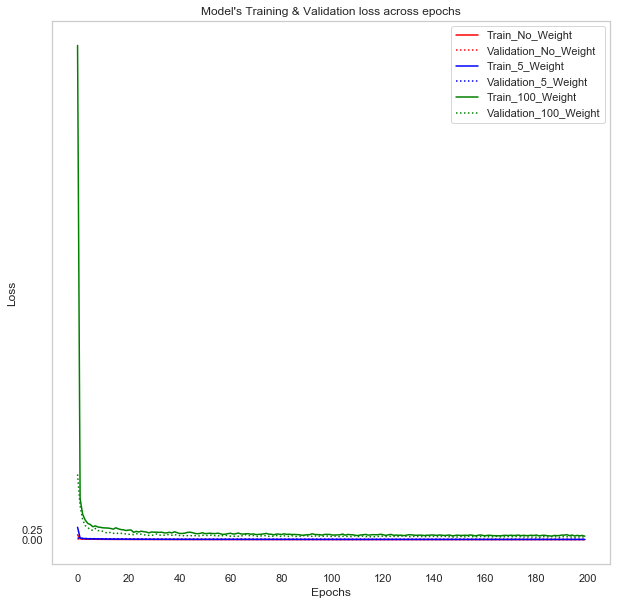

In [1313]:
plot_data(run_data,'loss','val_loss',20,0,0.5,0.25,"Model's Training & Validation loss across epochs",'Loss','Epochs',['Train_No_Weight','Validation_No_Weight','Train_5_Weight','Validation_5_Weight','Train_100_Weight','Validation_100_Weight'],loc='upper right')

### Training & Validation Accuracy

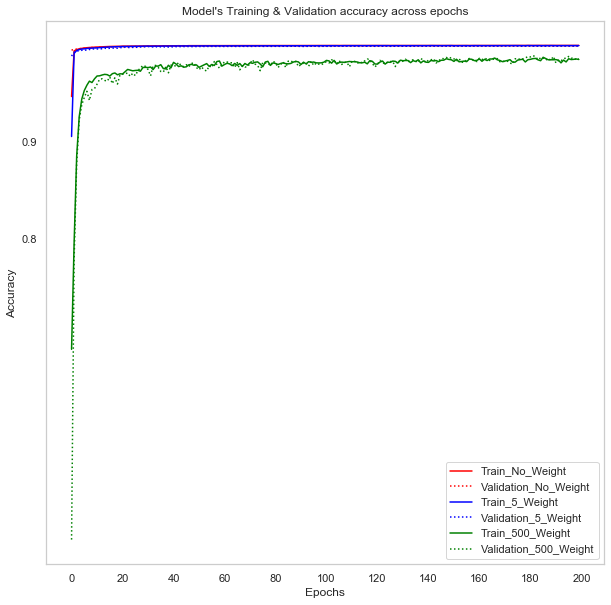

In [1314]:
plot_data(run_data,'accuracy','val_accuracy',20,0.8, 1,0.1,"Model's Training & Validation accuracy across epochs",'Accuracy','Epochs',['Train_No_Weight','Validation_No_Weight','Train_5_Weight','Validation_5_Weight','Train_500_Weight','Validation_500_Weight'],loc='lower right')

### Training & Validation Precision

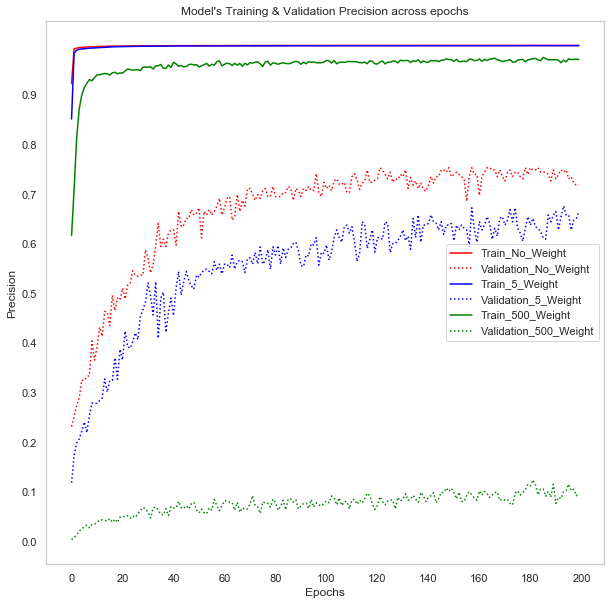

In [1315]:
plot_data(run_data,'precision','val_precision',20,0,1,0.1,"Model's Training & Validation Precision across epochs",'Precision','Epochs',['Train_No_Weight','Validation_No_Weight','Train_5_Weight','Validation_5_Weight','Train_500_Weight','Validation_500_Weight'],loc='lower middle')

### Training & Validation Recall (Sensitivity)

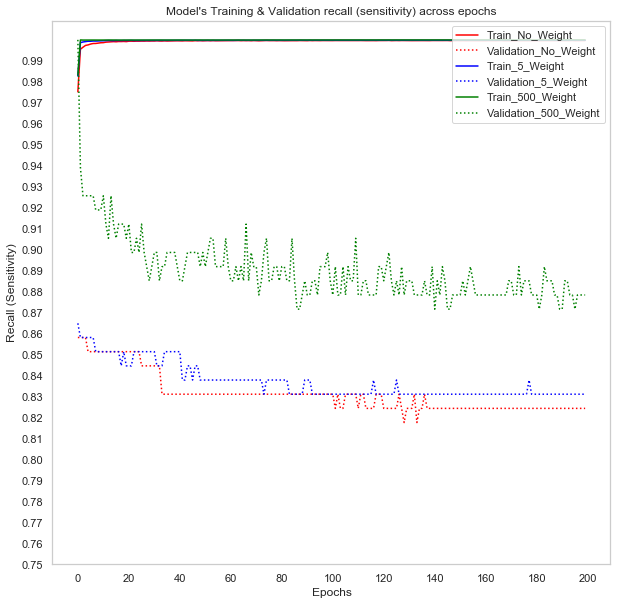

In [1316]:
plot_data(run_data,'recall','val_recall',20,0.75,1,0.01,"Model's Training & Validation recall (sensitivity) across epochs",'Recall (Sensitivity)','Epochs',['Train_No_Weight','Validation_No_Weight','Train_5_Weight','Validation_5_Weight','Train_500_Weight','Validation_500_Weight'],loc='upper right')

### Training & Validation Specificity

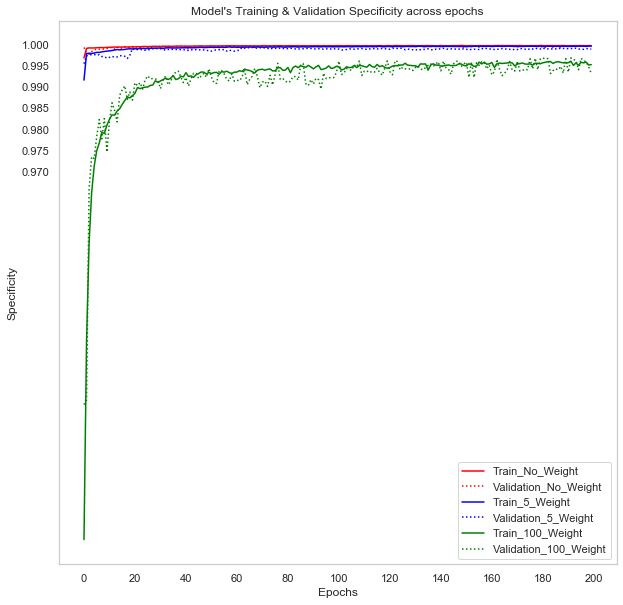

In [1317]:
plot_data(run_data,'specificity','val_specificity',20,0.97,1,0.005,"Model's Training & Validation Specificity across epochs",'Specificity','Epochs',['Train_No_Weight','Validation_No_Weight','Train_5_Weight','Validation_5_Weight','Train_100_Weight','Validation_100_Weight'],loc='lower right')

In [1318]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def calculate_and_plot_neural_network(model,color_index,title,label,algorithm):
    # predict probabilities for test set
    yhat_probs = model.predict(testX, verbose=0)
    # predict crisp classes for test set
    yhat_classes = model.predict_classes(testX, verbose=0)
    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)    
    
    calculate_and_print_scores(testy, yhat_classes,yhat_probs)

    plot_roc_auc(ax1,testy, yhat_probs,label)
    
    plot_cm(ax2,testy, yhat_classes,color_index,title)
       
    create_barchart_label(label,algorithm)
    
    create_table_label(label,algorithm)

In [1319]:
def plot_roc_auc_neural_network(ax, testy, yhat_probs,label):
    #Show ROC-AUC Plot
    fig = plt.figure(figsize=(5,5))
    # plot no skill roc curve
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(testy, yhat_probs)
    # plot model roc curve
    plt.plot(fpr, tpr, marker='.', label = label)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.xlim(0,1)
    plt.ylabel('True Positive Rate')
    plt.ylim(0,1)
    plt.xticks(np.arange(0, 1, step=0.1))
    plt.yticks(np.arange(0, 1, step=0.1))
    #fig.suptitle('Receiver Operating Characteristics (ROC) Curve', fontsize=20)
    # show the legend
    plt.legend()
    # show the plot    

### Results for model with no weight

Accuracy: 0.999134
Precision: 0.717647
Sensitivity AKA Recall: 0.824324
F1 score: 0.767296
F2-Measure: 0.800525
ROC AUC: 0.962304
Legitimate Transactions Detected (True Negatives):  85247
Legitimate Transactions Incorrectly Detected (False Positives):  48
Fraudulent Transactions Missed (False Negatives):  26
Fraudulent Transactions Detected (True Positives):  122
Total Fraudulent Transactions in validation dataset:  148


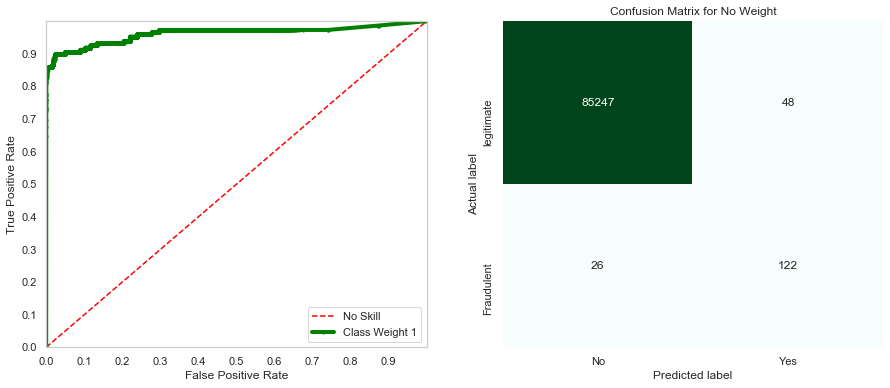

In [1320]:
calculate_and_plot_neural_network(model_no_weight,0,'Confusion Matrix for No Weight','Class Weight 1','Neural Network')

### Results for model with 5 weight for fraud class

Accuracy: 0.998982
Precision: 0.664865
Sensitivity AKA Recall: 0.831081
F1 score: 0.738739
F2-Measure: 0.791506
ROC AUC: 0.958601
Legitimate Transactions Detected (True Negatives):  85233
Legitimate Transactions Incorrectly Detected (False Positives):  62
Fraudulent Transactions Missed (False Negatives):  25
Fraudulent Transactions Detected (True Positives):  123
Total Fraudulent Transactions in validation dataset:  148


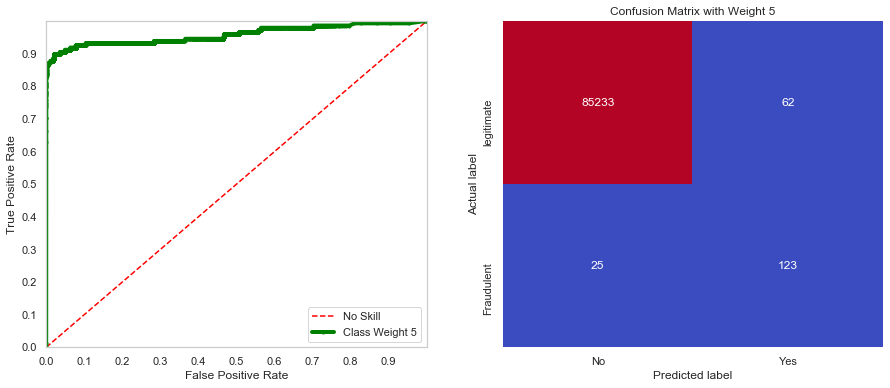

In [1321]:
calculate_and_plot_neural_network(model_5_weight,1,'Confusion Matrix with Weight 5','Class Weight 5','Neural Network')

### Results for model with 500 weight for fraud class

Accuracy: 0.985768
Precision: 0.097892
Sensitivity AKA Recall: 0.878378
F1 score: 0.176152
F2-Measure: 0.338542
ROC AUC: 0.972720
Legitimate Transactions Detected (True Negatives):  84097
Legitimate Transactions Incorrectly Detected (False Positives):  1198
Fraudulent Transactions Missed (False Negatives):  18
Fraudulent Transactions Detected (True Positives):  130
Total Fraudulent Transactions in validation dataset:  148


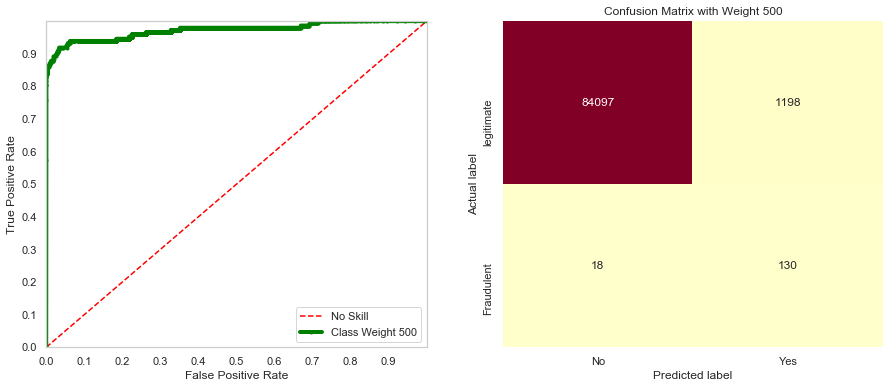

In [1322]:
calculate_and_plot_neural_network(model_500_weight,2,'Confusion Matrix with Weight 500','Class Weight 500','Neural Network')

<h1 style="color:brown"><center>Summarizing the Results</h3></center>

In [1323]:
import matplotlib.pyplot as plt

def plot_summary_barcharts():
    #colors=['blue', 'yellow', 'green']
    colors=['lightskyblue', 'cornflowerblue', 'blue']
    edgecolor="grey"
    label_font = {'family': 'serif', 'color':  'darkblue', 'weight': 'normal', 'size': 12 }
    title_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 18 }
    footer_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 15 }
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
    fig.set_size_inches(15, 50) 
    
    #ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlim(left=0.7, right=1)
    ax1.barh(np.arange(len(arr_roc_auc)), arr_roc_auc, align='center',edgecolor=edgecolor, color=colors )
    ax1.set_xlabel('AUC Value',fontdict=footer_font)
    ax1.set_yticks(np.arange(len(arr_roc_auc)))
    ax1.set_yticklabels(arr_barchart_labels,fontdict=label_font)
    ax1.set_title('AUC across Algoritms',fontdict=title_font)
    ax1.set_facecolor('w')

    #ax2 = fig.add_subplot(2,1,2)
    ax2.set_xlim(left=0.97, right=1)
    ax2.barh(np.arange(len(arr_accuracy)), arr_accuracy, align='center',edgecolor=edgecolor, color=colors )
    ax2.set_xlabel('Accuracy Value',fontdict=footer_font)
    ax2.set_yticks(np.arange(len(arr_accuracy)))
    ax2.set_yticklabels(arr_barchart_labels,fontdict=label_font)
    ax2.set_title('Accuracy across Algoritms',fontdict=title_font)
    ax2.set_facecolor('w')
    
    ax3.set_xlim(left=0.75, right=0.9)
    ax3.barh(np.arange(len(arr_recall)), arr_recall, align='center',edgecolor=edgecolor, color=colors )
    ax3.set_xlabel('Recall Value',fontdict=footer_font)
    ax3.set_yticks(np.arange(len(arr_recall)))
    ax3.set_yticklabels(arr_barchart_labels,fontdict=label_font)
    ax3.set_title('Sensitivity AKA Recall across Algoritms',fontdict=title_font)
    ax3.set_facecolor('w')
    
    plt.show()

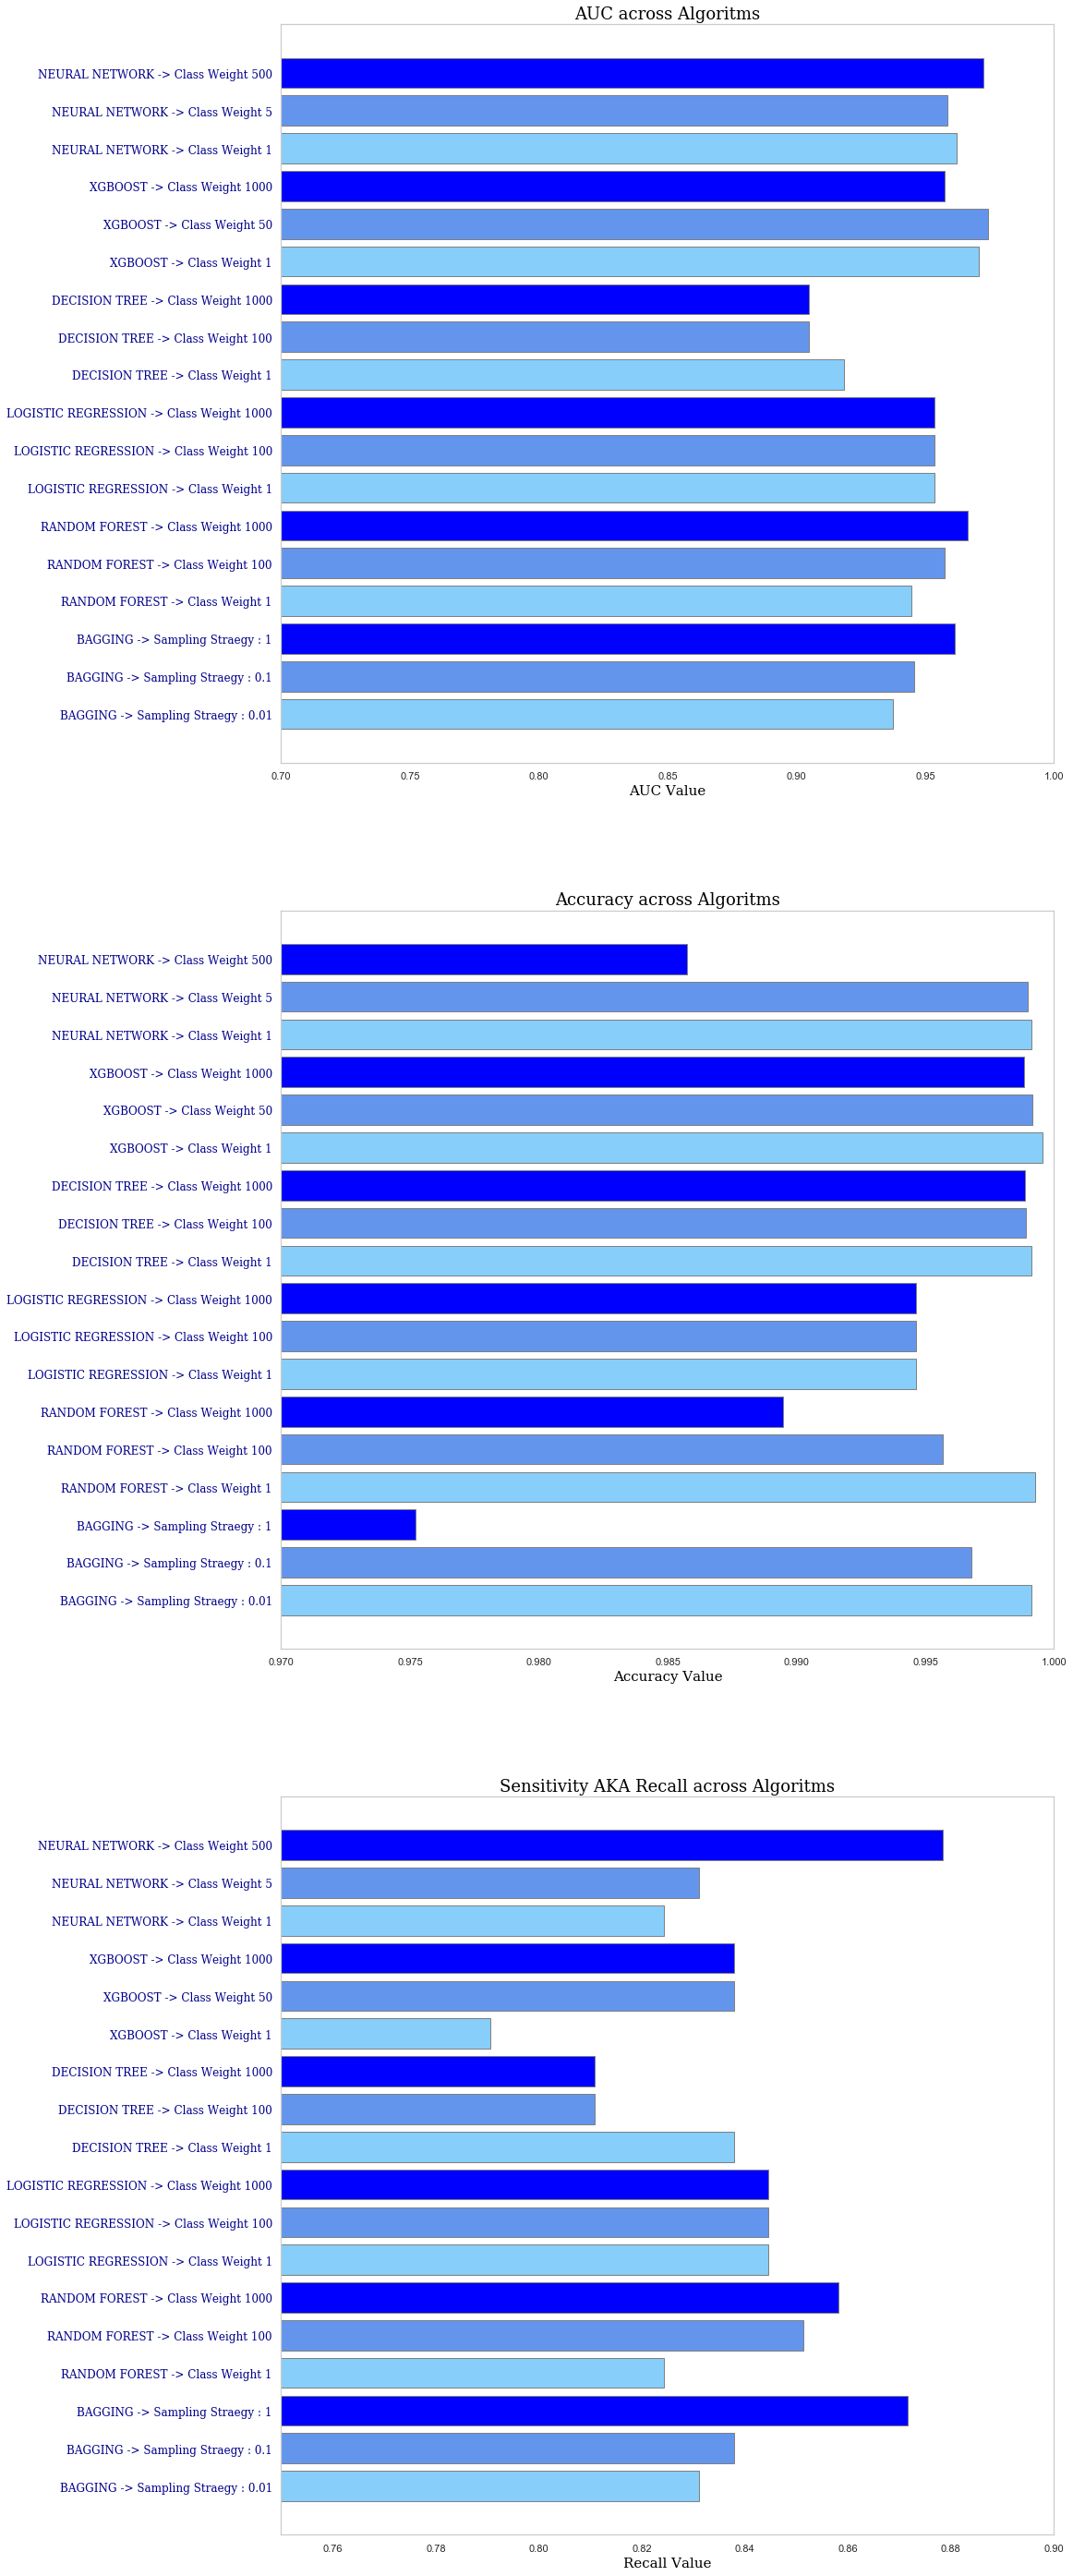

In [1324]:
plot_summary_barcharts()

In [1325]:
arr_table_labels

['BAGGING -> Sampling Straegy : 0.01',
 'BAGGING -> Sampling Straegy : 0.1',
 'BAGGING -> Sampling Straegy : 1',
 'RANDOM FOREST -> Class Weight 1',
 'RANDOM FOREST -> Class Weight 100',
 'RANDOM FOREST -> Class Weight 1000',
 'LOGISTIC REGRESSION -> Class Weight 1',
 'LOGISTIC REGRESSION -> Class Weight 100',
 'LOGISTIC REGRESSION -> Class Weight 1000',
 'DECISION TREE -> Class Weight 1',
 'DECISION TREE -> Class Weight 100',
 'DECISION TREE -> Class Weight 1000',
 'XGBOOST -> Class Weight 1',
 'XGBOOST -> Class Weight 50',
 'XGBOOST -> Class Weight 1000',
 'NEURAL NETWORK -> Class Weight 1',
 'NEURAL NETWORK -> Class Weight 5',
 'NEURAL NETWORK -> Class Weight 500']

In [1327]:
def plot_summary_table():
    #results=pd.DataFrame(list(arr_table_labels,arr_accuracy,arr_roc_auc,arr_recall,arr_precision,arr_f1score,arr_f2measure,arr_tp,arr_fn,arr_tn,arr_fp))
    #results.columns = ['Algoritm','Accuracy','ROC-AUC','Recall','Precision','F1-Score','F2-Measure','TP','FN','TN','FP']
    
    results = pd.DataFrame({
    'Algoritm': arr_table_labels,
    'Accuracy': arr_accuracy,
    'ROC-AUC': arr_roc_auc,
    'Recall': arr_recall,
    'Precision': arr_precision,
    'F1-Score' : arr_f1score,
    'TP' : arr_tp,
    'FN' : arr_fn,
    'TN' : arr_tn,
    'FP' : arr_fp
    })
    
    return results

In [1328]:
plot_summary_table()

Algoritm  Accuracy   ROC-AUC    Recall  \
0         BAGGING -> Sampling Straegy : 0.01  0.999122  0.937494  0.831081   
1          BAGGING -> Sampling Straegy : 0.1  0.996781  0.945874  0.837838   
2            BAGGING -> Sampling Straegy : 1  0.975235  0.961538  0.871622   
3            RANDOM FOREST -> Class Weight 1  0.999263  0.944639  0.824324   
4          RANDOM FOREST -> Class Weight 100  0.995681  0.957426  0.851351   
5         RANDOM FOREST -> Class Weight 1000  0.989490  0.966482  0.858108   
6      LOGISTIC REGRESSION -> Class Weight 1  0.994640  0.953544  0.844595   
7    LOGISTIC REGRESSION -> Class Weight 100  0.994640  0.953544  0.844595   
8   LOGISTIC REGRESSION -> Class Weight 1000  0.994640  0.953544  0.844595   
9            DECISION TREE -> Class Weight 1  0.999122  0.918620  0.837838   
10         DECISION TREE -> Class Weight 100  0.998912  0.905024  0.810811   
11        DECISION TREE -> Class Weight 1000  0.998876  0.905007  0.810811   
12                 XGBOOST -> Class Weight 1  0.999567  0.970665  0.790541   
13                XGBOOST -> Class Weight 50  0.999146  0.974359  0.837838   
14              XGBOOST -> Class Weight 1000  0.998853  0.957629  0.837838   
15          NEURAL NETWORK -> Class Weight 1  0.999134  0.962304  0.824324   
16          NEURAL NETWORK -> Class Weight 5  0.998982  0.958601  0.831081   
17        NEURAL NETWORK -> Class Weight 500  0.985768  0.972720  0.878378   

    Precision  F1-Score   TP  FN     TN    FP  
0    0.710983  0.766355  123  25  85245    50  
1    0.330667  0.474187  124  24  85044   251  
2    0.057951  0.108677  129  19  83198  2097  
3    0.767296  0.794788  122  26  85258    37  
4    0.266385  0.405797  126  22  84948   347  
5    0.126494  0.220486  127  21  84418   877  
6    0.223214  0.353107  125  23  84860   435  
7    0.223214  0.353107  125  23  84860   435  
8    0.223214  0.353107  125  23  84860   435  
9    0.708571  0.767802  124  24  85244    51  
10   0.648649  0.720721  120  28  85230    65  
11   0.638298  0.714286  120  28  85227    68  
12   0.951220  0.863469  117  31  85289     6  
13   0.716763  0.772586  124  24  85246    49  
14   0.626263  0.716763  124  24  85221    74  
15   0.717647  0.767296  122  26  85247    48  
16   0.664865  0.738739  123  25  85233    62  
17   0.097892  0.176152  130  18  84097  1198